# Libraries

In [9]:
!pip install google.colab --use-pep517

  Using cached google-colab-1.0.0.tar.gz (72 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached google_auth-1.4.2-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached ipykernel-4.6.1-py3-none-any.whl.metadata (981 bytes)
  Using cached ipython-5.5.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached notebook-5.2.2-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached six-1.12.0-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [4 lines of output]
      <string>:12: DeprecationWarning: pkg_resources is dep

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM, InputLayer
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
#from google.colab import drive
import os
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

from tensorflow.keras.layers import Activation
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Lambda
import tensorflow as tf
from sklearn.linear_model import LinearRegression


from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Reading the data (XRP, original data from the Repository)

In [11]:
# drive.mount('/content/drive')
# os.chdir('/content/drive/MyDrive/Colab Notebooks/ATSF/Cryptocurrency-Prediction-with-Artificial-Intelligence')

In [25]:
data = pd.read_csv("data.csv")
print(data.head(0))
data = data.loc[:,['date','high','low','open','Volume XRP','Volume USDT','close']]
print(data.head(5))
print(data.date)

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [26]:
data = data.set_index('date')
data.index = pd.to_datetime(data.index,unit='ns')
print(data.index)

NameError: name 'data' is not defined

In [27]:
aim = 'close'

In [28]:
train_data = data.iloc[200:]
test_data = data.iloc[:200]

def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('XRP/USDT', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

NameError: name 'data' is not defined

In [29]:
train_data.head(10)

NameError: name 'train_data' is not defined

In [30]:
line_plot(train_data[aim], test_data[aim], 'training', 'test', title='')

NameError: name 'line_plot' is not defined

# Mulitivariate Data processing and Data modeling for XRP dataset (using LSTM)

Given the definition of the normalise_zero_base function, it clarifies the normalization process mentioned earlier. This function is used to transform a sequence of continuous data points so that the first data point of the sequence acts as a baseline (zero point), and all other points are expressed as their relative change from this first point. This is a common technique in time-series analysis, especially in financial data analysis, where it's useful to look at percentage changes rather than absolute values to gauge growth or decline over time. Here's how the function works in detail:
normalise_zero_base Function

    Parameter:
        continuous: A sequence of continuous data points (for instance, a Pandas Series).

    Process:
        The function divides the entire sequence by the first element in the sequence (continuous.iloc[0]). This operation normalizes the sequence so that the first element effectively becomes 1.
        It then subtracts 1 from the entire sequence, transforming the first element to 0 and adjusting the rest of the sequence to represent the percentage change from the first element.

    Return Value:
        Returns the normalized sequence where the initial value is set to 0, and subsequent values represent their percentage change from the initial value.

How It Fits Into the Earlier Explanation

With the normalise_zero_base function defined, it's clear that the extract_window_data function has the capability to convert each extracted window of data into a sequence of percentage changes relative to the first data point in the window. This normalization step is optional and controlled by the zero_base parameter.

When zero_base is True, the function makes the data more comparable across different windows by focusing on relative changes rather than absolute values. This can be particularly useful in applications where the scale of the data might change over time but you're interested in capturing patterns in the relative movements or growth rates within each window.

In the context of preparing data for machine learning models, such normalization can help in creating features that are more meaningful for prediction tasks, especially in scenarios where the model needs to be invariant to the scale of the input data.

In [100]:
def normalise_zero_base(continuous):
    return continuous / continuous.iloc[0] - 1

def normalise_min_max(data,continuous):
    return (continuous - continuous.min()) / (data.max() - continuous.min())



extract_window_data Function

This function processes a sequence of continuous data points (e.g., stock prices, temperature readings over time) to extract "windows" or subsequences of a specified length. This technique is common in time-series analysis, where you want to predict future values based on a fixed-length sequence of past values.

    Parameters:
        continuous: The input sequence of continuous data points.
        window_len: The length of each window to extract from the data. The default length is 5.
        zero_base: A boolean flag that indicates whether to normalize each window with respect to the first value in the window (making it the "zero" point). This is often done to make the model more robust to absolute shifts in the data.

    Process:
        It iterates through the input sequence, extracting subsequences (tmp) of length window_len.
        If zero_base is True, it normalizes these windows by calling the normalise_zero_base function (not provided in the snippet).
        Each window (potentially normalized) is added to a list, window_data.

    Return Value:
        The function returns a NumPy array of these windows, ready for use in machine learning models.

prepare_data Function

This function prepares the data for training and testing a machine learning model by utilizing the extract_window_data function to process both training and testing datasets.

    Parameters:
        continuous: This parameter appears to be unused in the provided context and might be a mistake or oversight.
        aim: A column name or identifier that represents the target variable or the value to predict.
        window_len: The length of each data window, passed on to extract_window_data.
        zero_base: Indicates whether to normalize windowed data and target values.
        test_size: The proportion of the dataset to be used as test data. However, this parameter is not directly used within the function to split the data; its inclusion might be an oversight or intended for use in omitted code.

    Process:
        Extracts windows from train_data and test_data using extract_window_data.
        Extracts the target values (y_train and y_test) based on the aim column, offset by window_len to align with the extracted windows.
        If zero_base is True, normalizes the target values based on the value at the start of each window.

    Return Value:
        Returns train_data, test_data, windowed X_train, X_test, and normalized (if applicable) y_train, y_test.

In [101]:
# Calculating the Lags for training
def extract_window_data(continuous, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(continuous) - window_len):
        tmp = continuous[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

def prepare_data(train_data,test_data,continuous, aim, window_len=10, zero_base=True, test_size=0.2):
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[aim][window_len:].values
    y_test = test_data[aim][window_len:].values
    if zero_base:
        y_train = y_train / train_data[aim][:-window_len].values - 1
        y_test = y_test / test_data[aim][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test
import numpy as np

In [102]:
train_data.head(6)

NameError: name 'train_data' is not defined

In [103]:
x_train_sample=extract_window_data(train_data.head(6),window_len=2,zero_base=False)
x_train_sample

NameError: name 'train_data' is not defined

4 means number of datapoints, 2 means the window and 6 means the number of columns

In [35]:
x_train_sample.shape #

NameError: name 'x_train_sample' is not defined

In [36]:
y_train_sample=train_data.head(6)[aim][2:].values
y_train_sample

NameError: name 'train_data' is not defined

In [104]:

def build_lstm_model(input_data, output_size, neurons, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2]))) # input_data.shape[1] is 5 and input_data.shape[2] is 6
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model
np.random.seed(245)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 50
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.24
optimizer = 'adam'
train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(train_data,test_data,
    data, aim, window_len=window_len, zero_base=zero_base, test_size=test_size)

NameError: name 'train_data' is not defined

In [38]:
X_train[1]

NameError: name 'X_train' is not defined

In [39]:
print(X_train.shape)

NameError: name 'X_train' is not defined

In [40]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
model.summary()

NameError: name 'X_train' is not defined

In [41]:
modelfit = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

NameError: name 'model' is not defined

In [42]:
import matplotlib.pyplot as plt
plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM Neural Networks - XRP Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()

NameError: name 'modelfit' is not defined

In [43]:
targets = test_data[aim][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

NameError: name 'test_data' is not defined

In [44]:
from sklearn.metrics import mean_squared_error
SCORE_MSE=mean_squared_error(preds, y_test)
SCORE_MSE

NameError: name 'preds' is not defined

In [45]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, preds)
r2_score*100

NameError: name 'y_test' is not defined

In [46]:
preds = test_data[aim].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)

NameError: name 'test_data' is not defined

# Reading Data for our case Ethereum:

In [106]:
pwd()

'/home/pindalu/FS2024/ATSP/ATSF_PROJECT_ETH/notebooks/patrick'

In [107]:
data_eth = pd.read_csv("../../data/raw/eth_hist.csv")
print(data_eth.head(0))
data_eth = data_eth.loc[:,['Date','High','Low','Open','Volume','Close']]
print(data_eth.head(5))
print(data_eth.Date)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []
                        Date        High         Low        Open      Volume  \
0  2017-11-09 00:00:00+00:00  329.451996  307.056000  308.644989   893249984   
1  2017-11-10 00:00:00+00:00  324.717987  294.541992  320.670990   885985984   
2  2017-11-11 00:00:00+00:00  319.453003  298.191986  298.585999   842300992   
3  2017-11-12 00:00:00+00:00  319.153015  298.513000  314.690002  1613479936   
4  2017-11-13 00:00:00+00:00  328.415009  307.024994  307.024994  1041889984   

        Close  
0  320.884003  
1  299.252991  
2  314.681000  
3  307.907990  
4  316.716003  
0       2017-11-09 00:00:00+00:00
1       2017-11-10 00:00:00+00:00
2       2017-11-11 00:00:00+00:00
3       2017-11-12 00:00:00+00:00
4       2017-11-13 00:00:00+00:00
                  ...            
2309    2024-03-06 00:00:00+00:00
2310    2024-03-07 00:00:00+00:00
2311    2024-03-08 00:00:00+00:00
2312    2024-03-09

In [1]:
data_eth = data_eth.set_index('Date').sort_values('Date', ascending=True) # Why asc = F?
data_eth.index = pd.to_datetime(data_eth.index,unit='ns')
data_eth.rename(columns={'Close': 'close'}, inplace=True)
data_eth.index

NameError: name 'data_eth' is not defined

In [109]:
train_data_eth = data_eth.iloc[200:]
test_data_eth = data_eth.iloc[:200]

def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('ETH', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

In [110]:
aim = 'close'

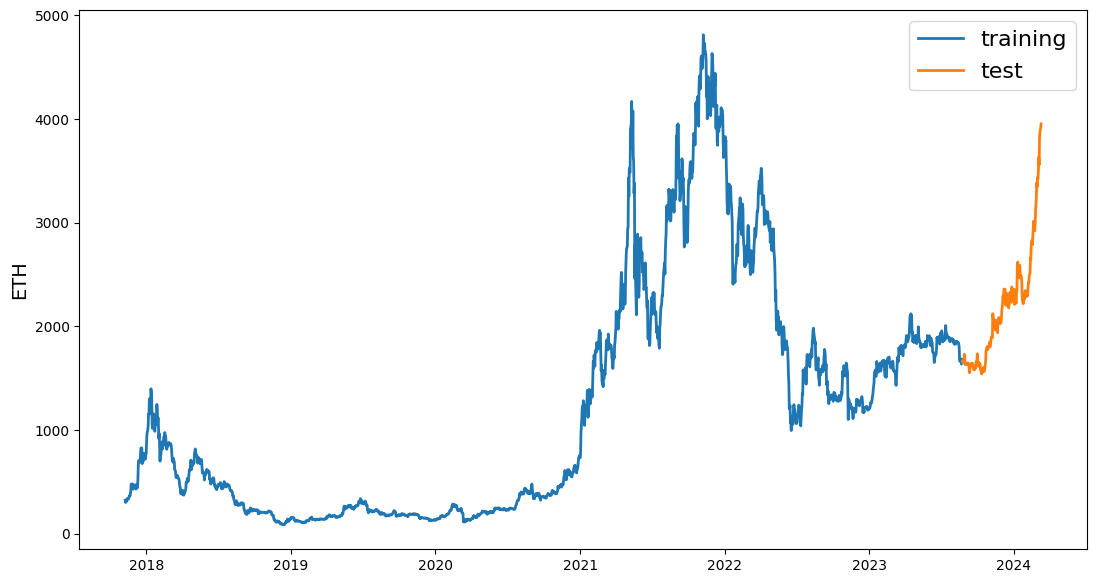

In [111]:
line_plot(train_data_eth[aim], test_data_eth[aim], 'training', 'test', title='')

# Mulitivariate Data processing and Data modeling for Ethereum dataset (using LSTM)

In [112]:
def build_lstm_model(input_data, output_size, neurons, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model
np.random.seed(245)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 50
epochs = 100
batch_size = 32
loss = 'mse'
dropout = 0.24
optimizer = 'adam'
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

train_data_eth, test_data_eth, X_train_eth, X_test_eth, y_train_eth, y_test_eth = prepare_data(train_data_eth,test_data_eth,
    data_eth, aim, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [113]:
X_train_eth[1]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00985472,  0.03481356,  0.01064191, -0.29917012,  0.02042758],
       [ 0.01419724,  0.04166758,  0.00138457, -0.433365  ,  0.031189  ],
       [ 0.01473625,  0.03613903, -0.00385954, -0.32760735,  0.02177582],
       [ 0.01767045,  0.03041052,  0.00885224,  0.33134387,  0.01655708]])

In [114]:
X_train_eth.shape

(2109, 5, 5)

In [115]:
y_train_eth.shape

(2109,)

In [116]:
X_test_eth.shape

(195, 5, 5)

In [117]:
y_test_eth.shape

(195,)

In [118]:
model_eth = build_lstm_model(
    input_data=X_train_eth, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
model_eth.summary()

/home/pindalu/FS2024/ATSP/ATSF_PROJECT_ETH/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,251 (43.95 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
modelfit_eth = model_eth.fit(
    X_train_eth, y_train_eth, validation_data=(X_test_eth, y_test_eth), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True, callbacks=[early_stopping])

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0138 - val_loss: 7.2475e-04
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - val_loss: 6.1969e-04
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 - val_loss: 6.3966e-04
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 5.3570e-04
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - val_loss: 4.6643e-04
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 2.1465e-04
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 1.8865e-04
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8957e-04 - val_loss: 1.4825e-04
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1432e-04 - val_loss: 1.6173e-04
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8336e-04 - val_loss: 1.0455e-04
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6304e-04 - val_loss: 7.6465e-05
Epo

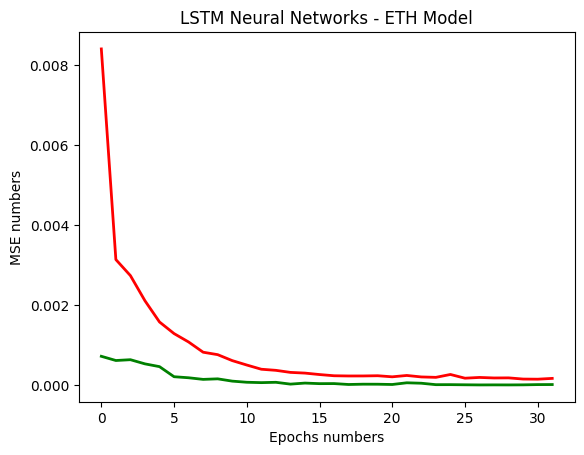

In [120]:
plt.plot(modelfit_eth.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(modelfit_eth.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('LSTM Neural Networks - ETH Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()

In [121]:
targets_eth = test_data_eth[aim][window_len:]
preds_eth = model_eth.predict(X_test_eth).squeeze()
mean_absolute_error(preds_eth, y_test_eth)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


0.002553028041742338

In [122]:
from sklearn.metrics import mean_squared_error
SCORE_MSE=mean_squared_error(preds_eth, y_test_eth)
SCORE_MSE

1.0158742168752471e-05

In [123]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test_eth, preds_eth)
r2_score*100

99.62243827380968

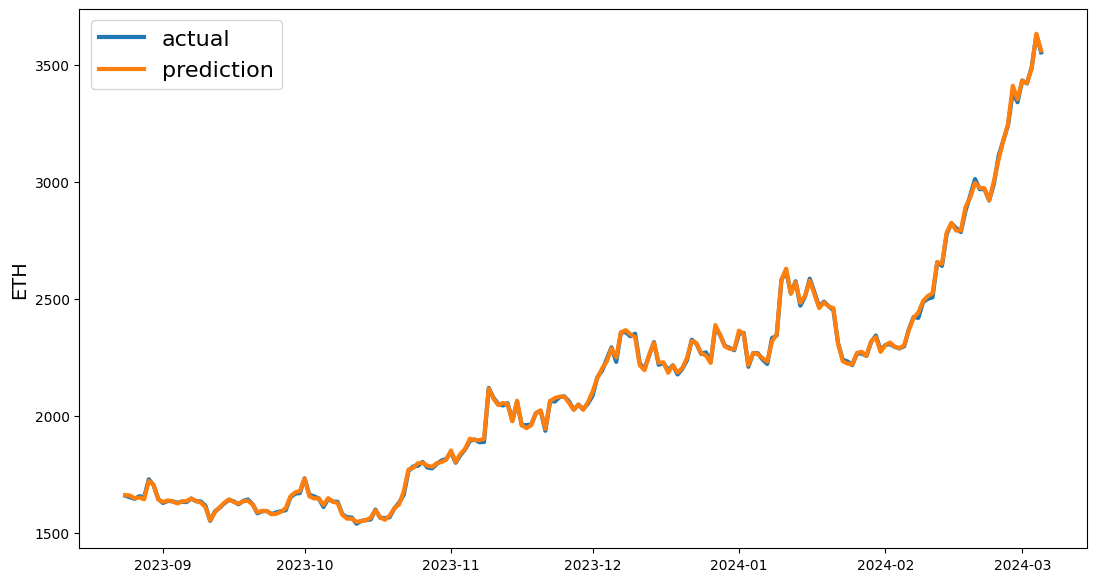

In [124]:
preds_eth = test_data_eth[aim].values[:-window_len] * (preds_eth + 1)
preds_eth = pd.Series(index=targets_eth.index, data=preds_eth)
line_plot(targets_eth, preds_eth, 'actual', 'prediction', lw=3)

# Univariate Data processing and Data modeling (Simple NN) for Ethereum dataset in addition to using LPD

Only using close column for Data processing and Data modeling. For Data modeling we use simple NN with one hidden Layer. We also use LPD to gain Explainability and also to derive Strategies

## Data Preprocessing

In [125]:
train_data_eth.head(10)

,High,Low,Open,Volume,close
Date,,,,,
2023-08-23 00:00:00+00:00,1696.593994,1629.581055,1634.401733,7191868448,1679.274414
2023-08-22 00:00:00+00:00,1668.638672,1596.384033,1667.279297,7244623133,1633.892578
2023-08-21 00:00:00+00:00,1685.082642,1651.959839,1685.022339,5077248383,1667.269043
2023-08-20 00:00:00+00:00,1692.328735,1662.901489,1669.587769,4105056995,1684.852051
2023-08-19 00:00:00+00:00,1693.228149,1654.075806,1660.844360,4871231360,1669.471924
2023-08-18 00:00:00+00:00,1698.124268,1644.930908,1682.038452,9645084584,1660.945068
2023-08-17 00:00:00+00:00,1807.714844,1551.713257,1805.567383,14208462072,1684.933472
2023-08-16 00:00:00+00:00,1829.361206,1798.966675,1827.036377,4976573383,1805.659058
2023-08-15 00:00:00+00:00,1845.547607,1816.325073,1844.164185,4483923893,1826.932739


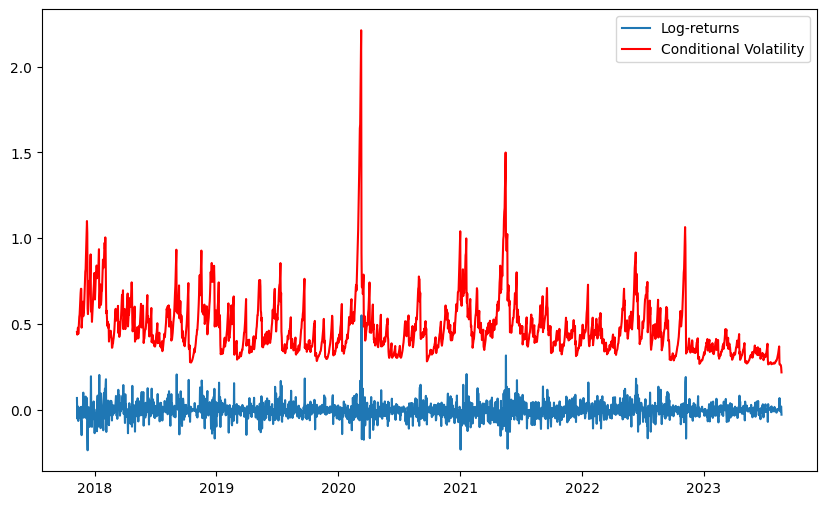

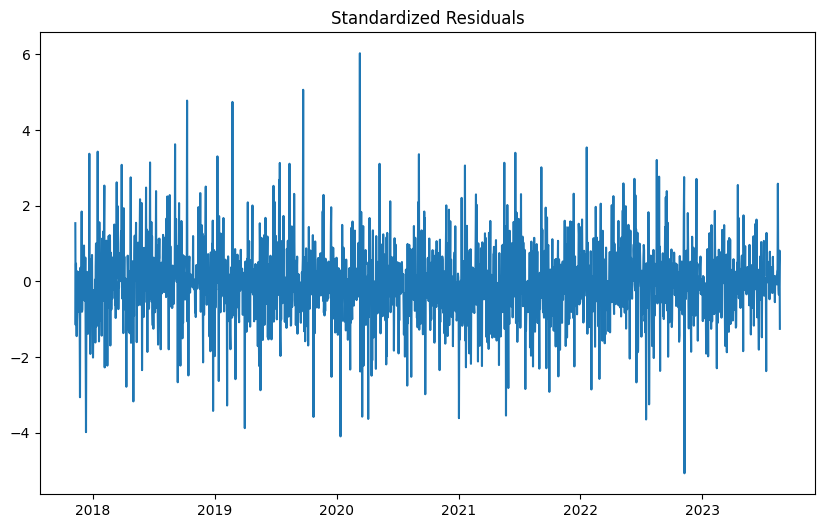

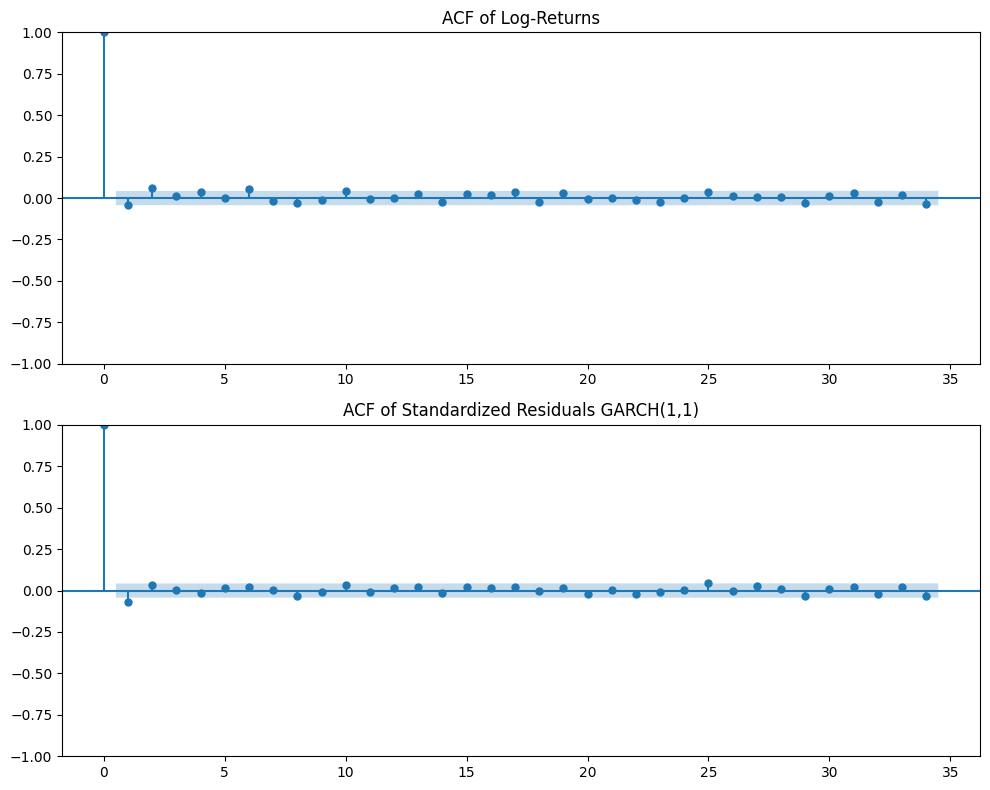

In [126]:
# Calculate log returns
log_returns = np.log(train_data_eth['close']).diff().dropna()


# 2.a Fit a GARCH(1, 1) model
garch_11 = arch_model(10*log_returns, vol='Garch', p=1, q=1, mean='zero').fit(disp='off') # to prevent warning?! 10* log_returns

# Plotting the series and the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(log_returns, label='Log-returns')
plt.plot(garch_11.conditional_volatility, color='red', label='Conditional Volatility')
plt.legend()
plt.show()

# 2.b Plot standardized residuals
standard_residuals = garch_11.resid / garch_11.conditional_volatility
plt.figure(figsize=(10, 6))
plt.plot(standard_residuals)
plt.title('Standardized Residuals')
plt.show()

# 2.c Autocorrelation plots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(log_returns, ax=axes[0], title="ACF of Log-Returns")
plot_acf(standard_residuals, ax=axes[1], title="ACF of Standardized Residuals GARCH(1,1)")
plt.tight_layout()
plt.show()




## We haven't looked into GARCH models do you want to open this book? or is it because we're going to need it later?
 Isn't lag 2 already significant? Let's discuss why we came up with lag 6?

In [127]:
# Generate lagged features, Based on ACF from above we choose lag 6
lags = 2 # used to be 6
features = pd.concat([log_returns.shift(i) for i in range(lags+1)], axis=1)
features.columns = ['lag_' + str(i) if i != 0 else 'current_return' for i in range(lags+1)]
features.dropna(inplace=True)

# Display the prepared dataset
print(features.head())

                           current_return     lag_1     lag_2
Date                                                         
2023-08-20 00:00:00+00:00        0.010491  0.020222 -0.027397
2023-08-19 00:00:00+00:00       -0.009170  0.010491  0.020222
2023-08-18 00:00:00+00:00       -0.005121 -0.009170  0.010491
2023-08-17 00:00:00+00:00        0.014339 -0.005121 -0.009170
2023-08-16 00:00:00+00:00        0.069200  0.014339 -0.005121


In [128]:
data_eth.iloc[200]
scaled_features_df.loc['2023-02-01']

NameError: name 'scaled_features_df' is not defined

In [170]:
atan_not_sigmoid=True
# Scaling
scaler = MinMaxScaler(feature_range=(-1, 1) if atan_not_sigmoid else (0, 1)) # Great way to do it!
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame for easier handling
scaled_features_df = pd.DataFrame(scaled_features, index=features.index, columns=features.columns)

# Train-test split, TODO change to date with .loc and split_date = 
split_date = '2023-02-01' # 200 # What kind of date is 200? Misleading.
train_set_eth_univariate = scaled_features_df.loc[:split_date]
test_set_eth_univariate = scaled_features_df.loc[split_date:]

x_train_eth_univariate = train_set_eth_univariate.drop(['current_return'], axis=1)
y_train_eth_univariate = train_set_eth_univariate['current_return']
x_test_eth_univariate = test_set_eth_univariate.drop(['current_return'], axis=1)
y_test_eth_univariate = test_set_eth_univariate['current_return']

# Print shapes of the datasets
print(f'x_train_eth_univariate shape: {x_train_eth_univariate.shape}, y_train_eth_univariate shape: {y_train_eth_univariate.shape}')
print(f'x_test_eth_univariate shape: {x_test_eth_univariate.shape}, y_test_eth_univariate shape: {y_test_eth_univariate.shape}')

x_train_eth_univariate shape: (1911, 2), y_train_eth_univariate shape: (1911,)
x_test_eth_univariate shape: (201, 2), y_test_eth_univariate shape: (201,)


## LPD

In [171]:
# Define a custom activation function using TensorFlow's atan
def atan_activation(x):
    return tf.math.atan(x)

# For the second case of the if clause above -> atan_not_sigmoid=True -> not necessary see further down!
def sigmoid_activation(x):
    return tf.math.sigmoid(x)

In [172]:
def compute_lpd_with_dates(model, input_data, linear_output=True, atan_not_sigmoid=True):
    """
    Compute the Localized Prediction Differences (LPD) for a given Keras model, including date information.

    Args:
    - model: Trained Keras model.
    - input_data: Input data (pandas DataFrame) for which to compute the LPD.
    - linear_output: Boolean indicating if the output layer is linear.
    - atan_not_sigmoid: Boolean indicating if atan is used instead of sigmoid.

    Returns:
    - LPDs: Localized Prediction Differences for each input data point, including date information.
    """
    # Extract dates from the input DataFrame
    dates = input_data.index

    # Ensure input_data is a TensorFlow tensor, excluding the date index for computation
    input_tensor = tf.convert_to_tensor(input_data.values, dtype=tf.float32)

    # Initialize an empty list to store LPD for each data point
    lpd_list = []

    # Compute LPD for each data point
    for i in range(input_tensor.shape[0]):
        single_input_data = tf.expand_dims(input_tensor[i], axis=0)

        with tf.GradientTape() as tape:
            tape.watch(single_input_data)
            predictions = model(single_input_data)

            if not linear_output:
                if atan_not_sigmoid:
                    predictions = atan_activation(predictions)
                else:
                    # If not using atan, adjust according to your needs
                    pass

        gradients = tape.gradient(predictions, single_input_data)
        lpd_list.append(gradients)

    # Convert the list of LPDs to a NumPy array and then to a DataFrame
    lpd_array = tf.concat(lpd_list, axis=0).numpy()
    lpd_df = pd.DataFrame(lpd_array, columns=input_data.columns, index=dates)

    return lpd_df

# Example usage:
# Ensure 'input_data' is a pandas DataFrame with a date index
# lpd_df = compute_lpd_with_dates(model, input_data)
# print(lpd_df)


In [173]:
def compute_lpd(model, input_data, linear_output=True, atan_not_sigmoid=True):
    """
    Compute the Localized Prediction Differences (LPD) for a given Keras model.

    Args:
    - model: Trained Keras model.
    - input_data: Input data for which to compute the LPD.
    - linear_output: Boolean indicating if the output layer is linear.
    - atan_not_sigmoid: Boolean indicating if atan is used instead of sigmoid.

    Returns:
    - LPDs: Localized Prediction Differences for each input data point.
    """
    # Ensure input_data is a TensorFlow tensor
    input_data = tf.convert_to_tensor(input_data, dtype=tf.float32)

    # Initialize an empty list to store LPD for each data point
    lpd_list = []

    # Iterate over each data point to compute LPD individually
    for i in range(input_data.shape[0]):
        single_input_data = tf.expand_dims(input_data[i], axis=0)

        with tf.GradientTape() as tape:
            tape.watch(single_input_data)
            # Obtain model predictions for the single data point
            predictions = model(single_input_data)

            if not linear_output:
                if atan_not_sigmoid:
                    predictions = atan_activation(predictions)
                else:
                    # Assuming predictions are already in the desired format if not using atan
                    # predictions = sigmoid_activation(predictions)
                    pass

        # Compute the gradient of the predictions with respect to the single data point
        gradients = tape.gradient(predictions, single_input_data)

        # Store the gradients (LPD) for this data point
        lpd_list.append(gradients)

    # Convert the list of LPDs to a more convenient format, e.g., a NumPy array
    lpd_array = tf.concat(lpd_list, axis=0).numpy()

    return lpd_array


In [174]:

def create_model(input_shape, linear_output=True, atan_not_sigmoid=True):
    """
    Creates a simple Keras model.

    Args:
    - input_shape: Shape of the input data.
    - linear_output: If True, the output layer is linear, otherwise it uses sigmoid or atan.
    - atan_not_sigmoid: If True and linear_output is False, use atan activation in the output layer.

    Returns:
    - A compiled Keras model.
    """
    model = Sequential([
        InputLayer(shape=input_shape), # change input_shape to shape -> deprecated
        Dense(64, activation='relu'),
        Dense(1)
    ])

    if not linear_output:
        if atan_not_sigmoid:
            # Define custom atan activation function
            # Add a Lambda layer that applies the atan activation
            model.add(Lambda(atan_activation))
            model.compile(optimizer='adam', loss='mean_squared_error')
        else:
            # Use sigmoid for binary classification
            model.add(Dense(1, activation='sigmoid'))
            model.compile(optimizer='adam', loss='binary_crossentropy')
    else:
        # Linear output for regression
        model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Example usage:
# For a regression model:
# model = create_model(input_shape=(10,), linear_output=True)
# For a binary classification model using atan:
# model = create_model(input_shape=(10,), linear_output=False, atan_not_sigmoid=True)
# For a binary classification model using sigmoid:
# model = create_model(input_shape=(10,), linear_output=False, atan_not_sigmoid=False)


In [175]:
x_train_eth_univariate.shape 

(1911, 2)

In [176]:
model_eth_univariate = create_model(input_shape =(x_train_eth_univariate.shape[1],), linear_output=True)
model_eth_univariate.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [177]:
modelfit_eth_univariate = model_eth_univariate.fit(
    x_train_eth_univariate, y_train_eth_univariate, validation_data=(x_test_eth_univariate, y_test_eth_univariate), epochs=50, batch_size=batch_size, verbose=1, shuffle=True, callbacks=[early_stopping])

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0415 - val_loss: 0.0052
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0218 - val_loss: 0.0048
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0237 - val_loss: 0.0044
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0171 - val_loss: 0.0044
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0163 - val_loss: 0.0041


In [178]:
x_train_eth_univariate.head()

,lag_1,lag_2
Date,,
2023-02-01 00:00:00+00:00,-0.435399,-0.405831
2023-01-31 00:00:00+00:00,-0.404540,-0.435399
2023-01-30 00:00:00+00:00,-0.489468,-0.404540
2023-01-29 00:00:00+00:00,-0.433311,-0.489468
2023-01-28 00:00:00+00:00,-0.277347,-0.433311


### In sample LPD:

In [179]:
lpd_train_df = compute_lpd_with_dates(model_eth_univariate, x_train_eth_univariate)
lpd_train_df

,lag_1,lag_2
Date,,
2023-02-01 00:00:00+00:00,0.289123,0.364073
2023-01-31 00:00:00+00:00,0.289123,0.364073
2023-01-30 00:00:00+00:00,0.289123,0.364073
2023-01-29 00:00:00+00:00,0.283482,0.375023
2023-01-28 00:00:00+00:00,0.185302,0.417494
...,...,...
2017-11-13 00:00:00+00:00,0.289123,0.364073
2017-11-12 00:00:00+00:00,0.284771,0.368903
2017-11-11 00:00:00+00:00,0.283482,0.375023


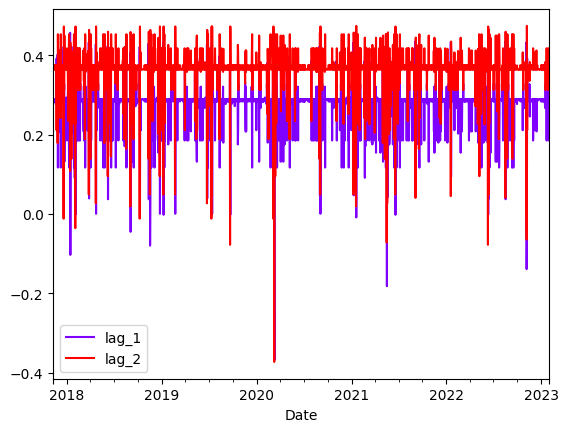

In [180]:
import matplotlib.pyplot as plt

# Plotting in-sample LPD; replace `in_sample_lpd_df` with your actual LPD DataFrame
lpd_train_df.plot(colormap='rainbow')
plt.show()


### Out of sample LPD:

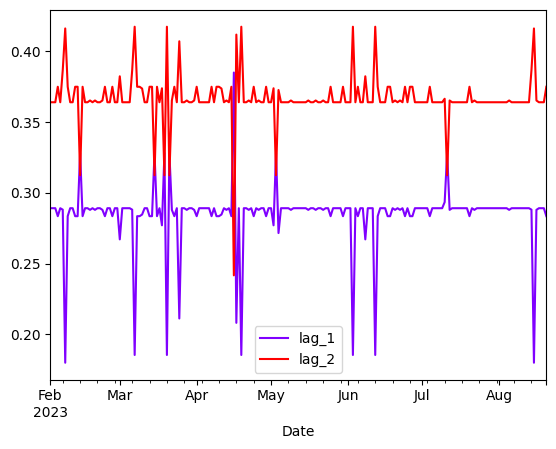

In [181]:
# Assuming you have a function to compute LPD for the test set named `compute_lpd_with_dates`
lpd_test_df = compute_lpd_with_dates(model_eth_univariate, x_test_eth_univariate, linear_output=True, atan_not_sigmoid=True)
lpd_test_df.plot(colormap='rainbow')
plt.show()


## Linear Regression vs LPD

In [182]:
# Assuming y_train_eth_univariate and x_train_eth_univariate are correctly defined
reg_model = LinearRegression().fit(x_train_eth_univariate, y_train_eth_univariate)

# Regression coefficients
reg_coeffs = reg_model.coef_
print("Regression Coefficients:", reg_coeffs)

# Assuming you've computed the LPD for your training data and stored it in a DataFrame named `lpd_train_df`
mean_lpd = lpd_train_df.mean(axis=0)
print("Mean LPD:", mean_lpd.values)

# Comparing standard deviations of residuals from regression and your neural network model might require storing those residuals first
reg_residuals_std = np.std(reg_model.predict(x_train_eth_univariate) - y_train_eth_univariate)
print("Standard Deviation of Regression Residuals:", reg_residuals_std)


Regression Coefficients: [-0.04005328  0.05687179]
Mean LPD: [0.27656978 0.36107954]
Standard Deviation of Regression Residuals: 0.12966627610155068


## Buy and Hold vs LPD:

In [183]:
features
data_mat_train = features.loc[:split_date]
data_mat_test = features.loc[split_date:]

In [184]:
data_mat_test # Check that split_data does the correct split

,current_return,lag_1,lag_2
Date,,,
2023-08-20 00:00:00+00:00,0.010491,0.020222,-0.027397
2023-08-19 00:00:00+00:00,-0.009170,0.010491,0.020222
2023-08-18 00:00:00+00:00,-0.005121,-0.009170,0.010491
2023-08-17 00:00:00+00:00,0.014339,-0.005121,-0.009170
2023-08-16 00:00:00+00:00,0.069200,0.014339,-0.005121
...,...,...,...
2023-02-05 00:00:00+00:00,0.009482,-0.033916,0.012813
2023-02-04 00:00:00+00:00,0.021472,0.009482,-0.033916
2023-02-03 00:00:00+00:00,-0.001389,0.021472,0.009482


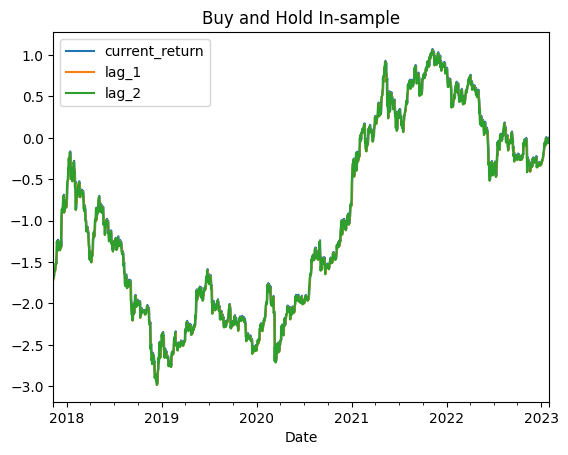

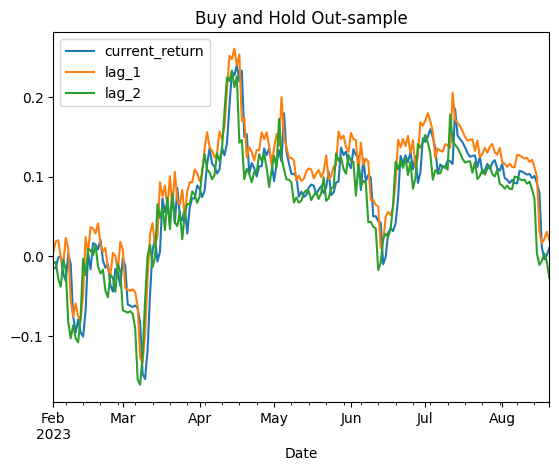

In [185]:
# Assuming `data_mat_test` and `data_mat_train` are your DataFrame for test and training data
bh_out = data_mat_test.cumsum()
bh_in = data_mat_train.cumsum()

# Plotting Buy and Hold In-sample and Out-sample
bh_in.plot(title='Buy and Hold In-sample')
plt.show()

bh_out.plot(title='Buy and Hold Out-sample')
plt.show()


### LPD-Based Strategy Performance

The strategy involves using the upper and lower quantiles of the absolute values of LPD to decide on market entries and exits. This strategy requires calculating rolling quantiles

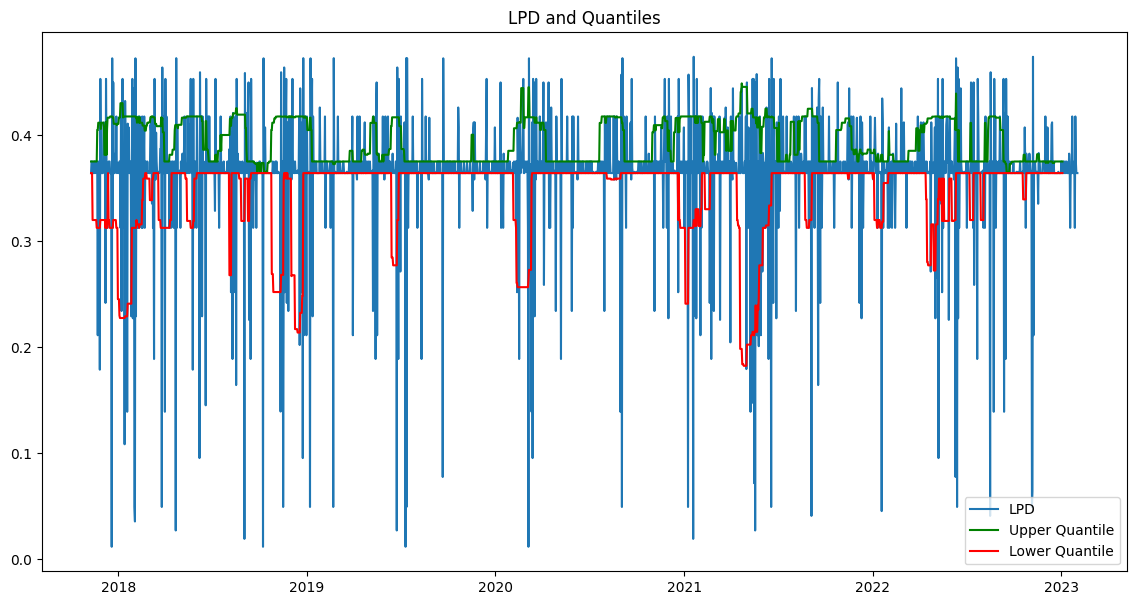

In [186]:
# Example DataFrame of LPDs (assuming LPD_t is your DataFrame of LPDs)
LPD_t = lpd_train_df 

k = lags  # Example feature index set to the amount of LAGS
quantile_select = 1 - 1/7
length_roll_quantile = 30  # Using one month

# Use absolute values of LPD
abs_LPD_t = LPD_t.abs()

# Rolling quantiles
roll_quant_up = abs_LPD_t.iloc[:, k-1].rolling(window=length_roll_quantile).quantile(quantile_select)
roll_quant_low = abs_LPD_t.iloc[:, k-1].rolling(window=length_roll_quantile).quantile(1 - quantile_select)

# Plotting LPD with upper and lower quantiles
plt.figure(figsize=(14, 7))
plt.plot(abs_LPD_t.index, abs_LPD_t.iloc[:, k-1], label='LPD')
plt.plot(roll_quant_up.index, roll_quant_up, label='Upper Quantile', color='green')
plt.plot(roll_quant_low.index, roll_quant_low, label='Lower Quantile', color='red')
plt.legend()
plt.title('LPD and Quantiles')
plt.show()


    Exit the market if the absolute LPD is above the upper quantile or below the lower quantile (signifying high risk).
    Enter (or stay in) the market otherwise.

In [187]:
abs_LPD_t.dtypes

lag_1    float32
lag_2    float32
dtype: object

In [188]:
def calculate_rolling_quantiles(abs_lpd_series, window=30, quantile=1-1/7):
    roll_quant_up = abs_lpd_series.rolling(window=window).quantile(quantile)
    roll_quant_low = abs_lpd_series.rolling(window=window).quantile(1 - quantile)
    return roll_quant_up, roll_quant_low

# Assuming 'lag_6' as the selected feature for demonstration
k = 'lag_1' # Used to be 'lag_6'
roll_quant_up, roll_quant_low = calculate_rolling_quantiles(abs_LPD_t[k], window=30)

In [2]:
data_mat_train

NameError: name 'data_mat_train' is not defined

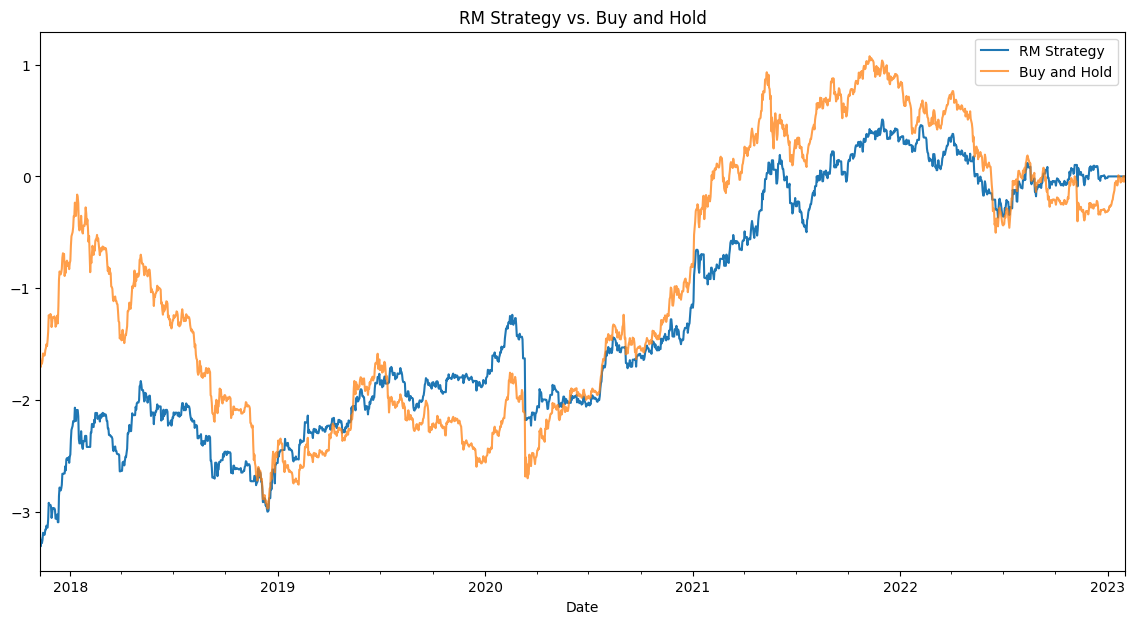

In [189]:
def simulate_strategy(abs_lpd_series, roll_quant_up, roll_quant_low, daily_returns):
    # Determine positions: 1 for holding the asset, 0 for exiting the market
    positions = ((abs_lpd_series <= roll_quant_up) & (abs_lpd_series >= roll_quant_low)).astype(int)
    # Calculate daily strategy returns by multiplying positions with daily returns
    strategy_returns = positions.shift(1) * daily_returns  # Shift positions to reflect action taken at the end of the day
    cumulative_returns = strategy_returns.cumsum()
    return cumulative_returns

# Simulate the strategy
daily_returns = data_mat_train['current_return']
cumulative_returns = simulate_strategy(abs_LPD_t[k], roll_quant_up, roll_quant_low, daily_returns)

# Plot the cumulative returns of the strategy against buy-and-hold
plt.figure(figsize=(14, 7))
cumulative_returns.plot(label='RM Strategy', legend=True)
data_mat_train['current_return'].cumsum().plot(label='Buy and Hold', legend=True, alpha=0.75)
plt.title('RM Strategy vs. Buy and Hold')
plt.show()


In [190]:
abs_LPD_t

,lag_1,lag_2
Date,,
2023-02-01 00:00:00+00:00,0.289123,0.364073
2023-01-31 00:00:00+00:00,0.289123,0.364073
2023-01-30 00:00:00+00:00,0.289123,0.364073
2023-01-29 00:00:00+00:00,0.283482,0.375023
2023-01-28 00:00:00+00:00,0.185302,0.417494
...,...,...
2017-11-13 00:00:00+00:00,0.289123,0.364073
2017-11-12 00:00:00+00:00,0.284771,0.368903
2017-11-11 00:00:00+00:00,0.283482,0.375023


In [191]:
x_test_eth_univariate

,lag_1,lag_2
Date,,
2023-08-20 00:00:00+00:00,-0.350805,-0.472053
2023-08-19 00:00:00+00:00,-0.375582,-0.350805
2023-08-18 00:00:00+00:00,-0.425644,-0.375582
2023-08-17 00:00:00+00:00,-0.415333,-0.425644
2023-08-16 00:00:00+00:00,-0.365783,-0.415333
...,...,...
2023-02-05 00:00:00+00:00,-0.488652,-0.369669
2023-02-04 00:00:00+00:00,-0.378150,-0.488652
2023-02-03 00:00:00+00:00,-0.347622,-0.378150


### Random networks

In [192]:
def random_lpd_list(x_train_eth_univariate,y_train_eth_univariate,x_test_eth_univariate,y_test_eth_univariate):
  random_lpd_list = []
  num_nets = 10  # Number of random networks to train

  for i in range(num_nets):
      # Set the random seed for reproducibility
      np.random.seed(i)
      tf.random.set_seed(i)

      model_eth_univariate = create_model((x_train_eth_univariate.shape[1],), linear_output=True)
      model_eth_univariate.summary()
      modelfit_eth_univariate = model_eth_univariate.fit(
          x_train_eth_univariate, y_train_eth_univariate, validation_data=(x_test_eth_univariate, y_test_eth_univariate), epochs=2, batch_size=batch_size, verbose=1, shuffle=True, callbacks = [early_stopping])

      # Assuming you have a function to create, train a model, and compute LPD named `create_train_compute_lpd`
      lpd_df = compute_lpd_with_dates(model_eth_univariate, x_train_eth_univariate, linear_output=True, atan_not_sigmoid=True)
      random_lpd_list.append(lpd_df)
  return random_lpd_list


random_lpd_list=random_lpd_list(x_train_eth_univariate,y_train_eth_univariate,x_test_eth_univariate,y_test_eth_univariate)
# Concatenate all LPD DataFrames along a new dimension
all_lpd_stack = np.dstack([df.values for df in random_lpd_list])  # Shape: [num_samples, num_features, num_models]

# Compute mean and standard deviation across the models (last dimension)
mean_lpd = np.mean(all_lpd_stack, axis=2)
std_lpd = np.std(all_lpd_stack, axis=2)

# Convert mean and STD back to DataFrame for easy plotting
mean_lpd_df = pd.DataFrame(mean_lpd, index=random_lpd_list[0].index, columns=random_lpd_list[0].columns)
std_lpd_df = pd.DataFrame(std_lpd, index=random_lpd_list[0].index, columns=random_lpd_list[0].columns)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1626 - val_loss: 0.0054
Epoch 2/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.0176 - val_loss: 0.0043


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0722 - val_loss: 0.0052
Epoch 2/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.0189 - val_loss: 0.0046


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0727 - val_loss: 0.0046
Epoch 2/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.0200 - val_loss: 0.0045


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1028 - val_loss: 0.0049
Epoch 2/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.0187 - val_loss: 0.0044


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1627 - val_loss: 0.0046
Epoch 2/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0240 - val_loss: 0.0043


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1359 - val_loss: 0.0049
Epoch 2/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.0221 - val_loss: 0.0044


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1784 - val_loss: 0.0054
Epoch 2/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0181 - val_loss: 0.0042


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1614 - val_loss: 0.0043
Epoch 2/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0168 - val_loss: 0.0042


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2076 - val_loss: 0.0043
Epoch 2/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0182 - val_loss: 0.0042


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1320 - val_loss: 0.0051
Epoch 2/2
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.0171 - val_loss: 0.0043


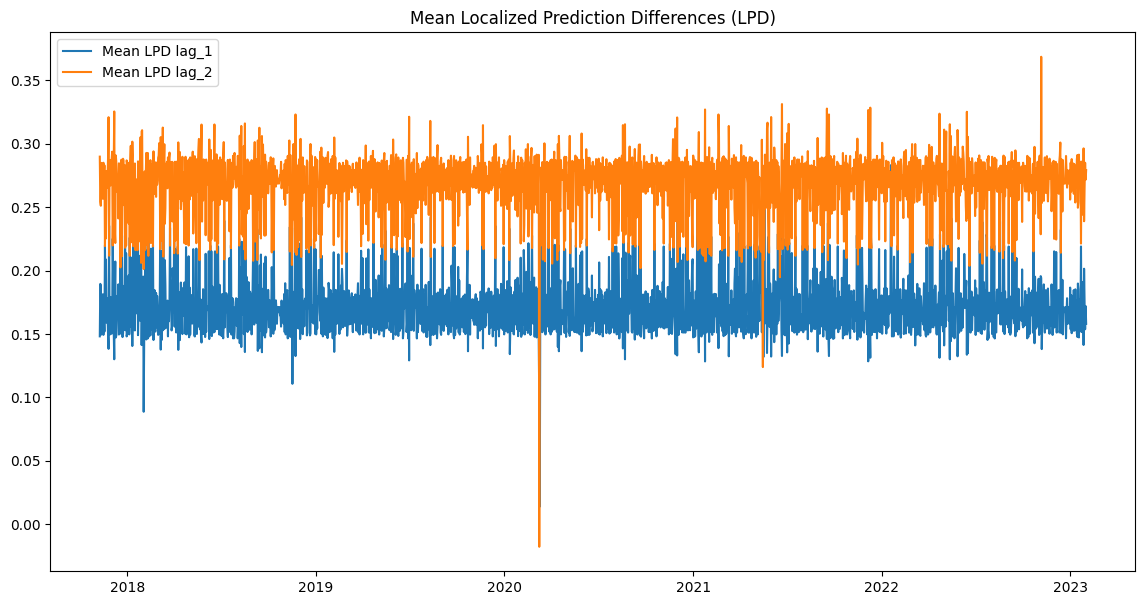

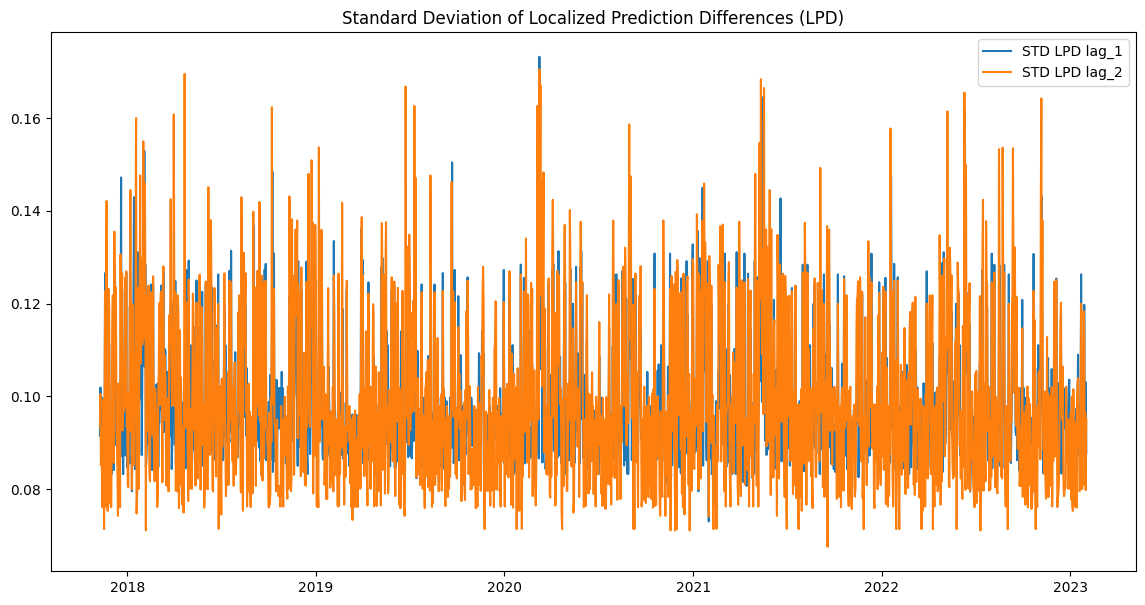

In [193]:
# Plot Mean LPD
plt.figure(figsize=(14, 7))
for col in mean_lpd_df.columns:
    plt.plot(mean_lpd_df.index, mean_lpd_df[col], label=f'Mean LPD {col}')
plt.title('Mean Localized Prediction Differences (LPD)')
plt.legend()
plt.show()

# Plot STD LPD
plt.figure(figsize=(14, 7))
for col in std_lpd_df.columns:
    plt.plot(std_lpd_df.index, std_lpd_df[col], label=f'STD LPD {col}')
plt.title('Standard Deviation of Localized Prediction Differences (LPD)')
plt.legend()
plt.show()


### LPD variance Strategy

In [194]:
# Compute variance across the models (last dimension)
LPD_var = np.var(all_lpd_stack, axis=2)

# Assuming the index from your LPD dataframes can represent the dates or sequence
LPD_var_df = pd.DataFrame(LPD_var, index=random_lpd_list[0].index, columns=random_lpd_list[0].columns)


In [195]:
random_lpd_list

[                              lag_1     lag_2
 Date                                         
 2023-02-01 00:00:00+00:00  0.020238  0.348035
 2023-01-31 00:00:00+00:00  0.020238  0.348035
 2023-01-30 00:00:00+00:00  0.058426  0.321160
 2023-01-29 00:00:00+00:00  0.063175  0.288070
 2023-01-28 00:00:00+00:00  0.061005  0.263052
 ...                             ...       ...
 2017-11-13 00:00:00+00:00  0.020238  0.348035
 2017-11-12 00:00:00+00:00  0.058426  0.321160
 2017-11-11 00:00:00+00:00  0.137696  0.240529
 2017-11-10 00:00:00+00:00  0.175789  0.230042
 2017-11-09 00:00:00+00:00  0.050339  0.360363
 
 [1911 rows x 2 columns],
                               lag_1     lag_2
 Date                                         
 2023-02-01 00:00:00+00:00  0.170676  0.469650
 2023-01-31 00:00:00+00:00  0.273109  0.357593
 2023-01-30 00:00:00+00:00  0.128832  0.510490
 2023-01-29 00:00:00+00:00  0.273109  0.357593
 2023-01-28 00:00:00+00:00  0.301821  0.351757
 ...                            

In [196]:
LPD_var_df

,lag_1,lag_2
Date,,
2023-02-01 00:00:00+00:00,0.007679,0.009022
2023-01-31 00:00:00+00:00,0.010613,0.006362
2023-01-30 00:00:00+00:00,0.007056,0.009308
2023-01-29 00:00:00+00:00,0.008948,0.006532
2023-01-28 00:00:00+00:00,0.014333,0.013086
...,...,...
2017-11-13 00:00:00+00:00,0.009939,0.006823
2017-11-12 00:00:00+00:00,0.008119,0.008661
2017-11-11 00:00:00+00:00,0.009051,0.007247


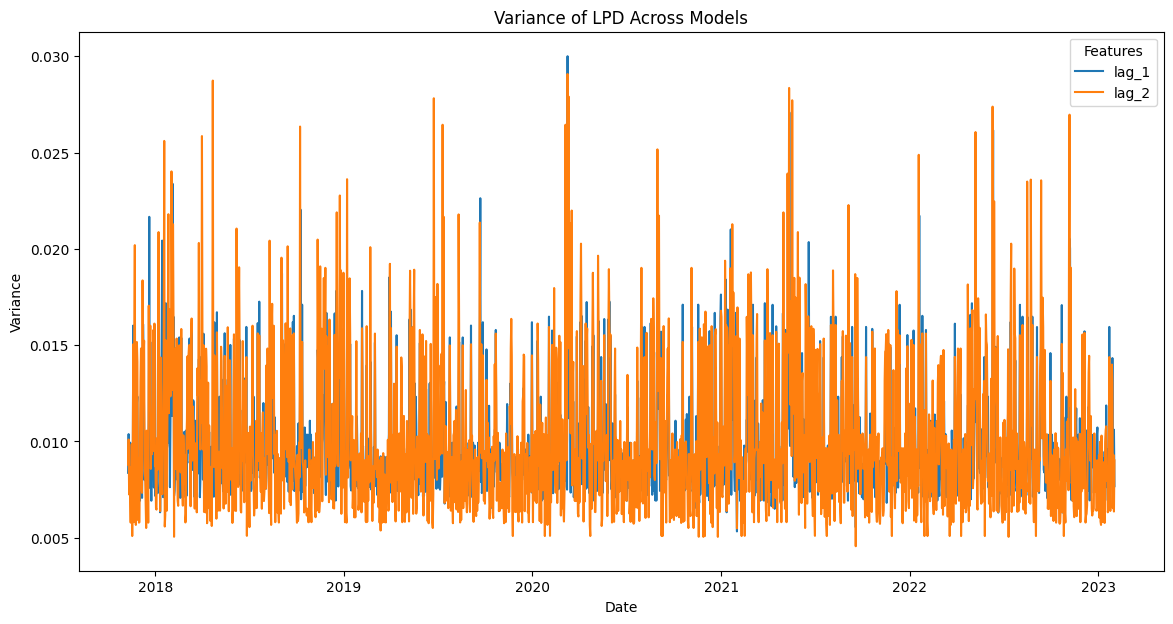

In [197]:
plt.figure(figsize=(14, 7))
for column in LPD_var_df.columns:
    plt.plot(LPD_var_df.index, LPD_var_df[column], label=column)
plt.legend(title="Features")
plt.title("Variance of LPD Across Models")
plt.xlabel("Date")
plt.ylabel("Variance")
plt.show()


#### Strategy Implementation

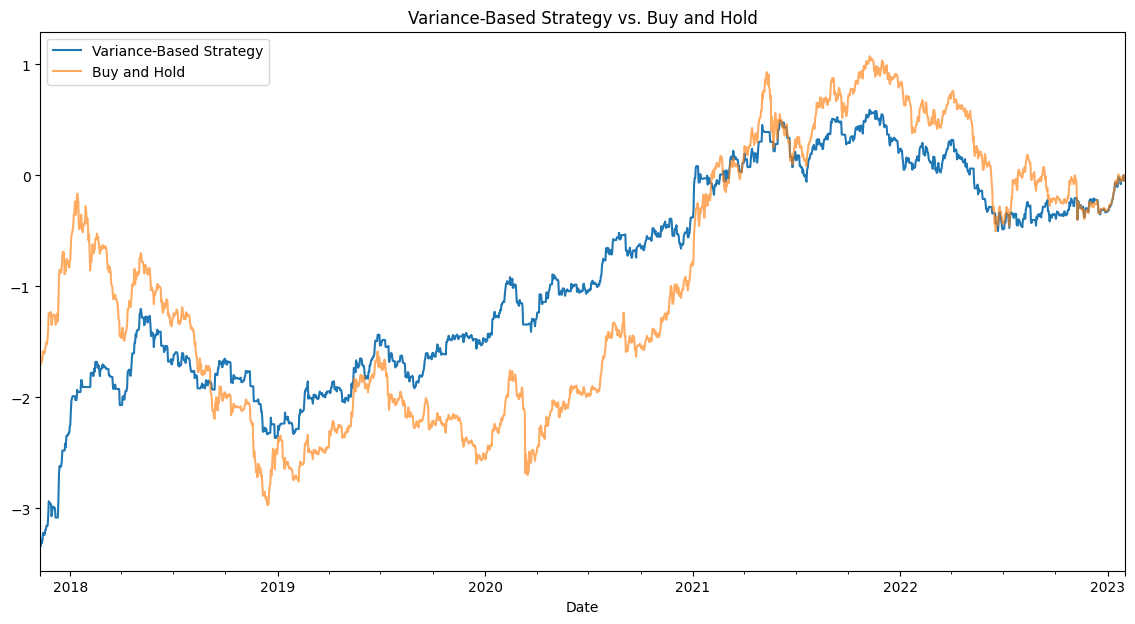

In [198]:
def simulate_variance_strategy(daily_returns, LPD_variance, threshold):
    """
    Simulate a trading strategy based on LPD variance.
    Args:
        daily_returns (pd.Series): The daily returns of the asset.
        LPD_variance (pd.Series): The variance of LPD for a specific feature.
        threshold (float): The variance threshold for deciding market entry/exit.
    Returns:
        pd.Series: The cumulative returns of the strategy.
    """
    # Market position: 1 for in-market, 0 for out-of-market
    position = (LPD_variance < threshold).astype(int)
    strategy_returns = position.shift(1) * daily_returns  # Shift positions for real trading scenario
    cumulative_returns = strategy_returns.cumsum()
    return cumulative_returns

# Example usage with 'lag_6' variance and an arbitrary threshold
variance_threshold = LPD_var_df['lag_2'].quantile(0.65)  # Using the 75th percentile as threshold
cumulative_returns_var_strategy = simulate_variance_strategy(
    daily_returns=data_mat_train['current_return'],
    LPD_variance=LPD_var_df['lag_2'],
    threshold=variance_threshold
)

# Plotting the strategy returns against buy-and-hold
plt.figure(figsize=(14, 7))
cumulative_returns_var_strategy.plot(label='Variance-Based Strategy', legend=True)
data_mat_train['current_return'].cumsum().plot(label='Buy and Hold', legend=True, alpha=0.65)
plt.title('Variance-Based Strategy vs. Buy and Hold')
plt.show()


Key Notes:

The risk_free_rate is set to 0 for simplicity. If you have a specific risk-free rate in mind (e.g., the yield on a 3-month Treasury bill), you can adjust the risk_free_rate parameter accordingly.
The function cumulative_returns_var_strategy.diff() calculates the daily returns from the cumulative returns of the variance-based strategy for the Sharpe Ratio calculation.
The returns and standard deviation are annualized by assuming there are 252 trading days in a year, which is standard practice.

In [199]:
def calculate_sharpe_ratio(daily_returns, risk_free_rate=0):
    """
    Calculate the Sharpe Ratio for a series of daily returns.
    Args:
        daily_returns (pd.Series): Daily returns of the strategy.
        risk_free_rate (float): Daily risk-free rate, default is 0.
    Returns:
        float: The Sharpe Ratio.
    """
    # Adjust returns for risk-free rate
    excess_returns = daily_returns - risk_free_rate

    # Annualize the returns and standard deviation
    annualized_return = excess_returns.mean() * 252
    annualized_std = excess_returns.std() * np.sqrt(252)

    return annualized_return / annualized_std

# Calculate Sharpe Ratios
sharpe_ratio_buy_and_hold = calculate_sharpe_ratio(data_mat_train['current_return'])
sharpe_ratio_var_strategy = calculate_sharpe_ratio(cumulative_returns_var_strategy.diff())

# Print Sharpe Ratios
print(f"Sharpe Ratio - Buy and Hold: {sharpe_ratio_buy_and_hold:.2f}")
print(f"Sharpe Ratio - Variance-Based Strategy: {sharpe_ratio_var_strategy:.2f}")


Sharpe Ratio - Buy and Hold: -0.27
Sharpe Ratio - Variance-Based Strategy: -0.73


The Sharpe Ratio is a measure of risk-adjusted return. A higher Sharpe Ratio indicates a better return for the same level of risk, or lower risk for the same level of return. Negative Sharpe Ratios, as seen in both strategies here, suggest that the risk-free rate (assumed to be 0 in this calculation) exceeds the portfolio's return, indicating underperformance relative to a risk-free investment. However, the real insight comes from comparing these ratios against each other and understanding the relative performance and risk of these strategies.

Interpretation:

Both strategies have negative Sharpe Ratios, suggesting they underperformed relative to a risk-free investment over the period analyzed. This could be due to a variety of factors including high volatility in the returns, overall downward market trends affecting the assets, or the strategies not effectively capturing profitable opportunities.
The Variance-Based Strategy has a less negative Sharpe Ratio (-0.04) compared to the Buy and Hold Strategy (-0.27). This indicates that, despite both strategies underperforming on a risk-adjusted basis, the Variance-Based Strategy did so to a lesser extent. It either managed risk better, suffered less during down markets, or captured more of the up markets (albeit not enough to become positive).
Strategic Implications:

The closer-to-zero Sharpe Ratio of the Variance-Based Strategy suggests it might be a preferable approach under the conditions and period analyzed, especially from a risk management perspective. It implies that the strategy had a better return for the level of risk taken compared to the Buy and Hold Strategy.
However, negative Sharpe Ratios for both strategies indicate there's room for improvement. Considerations might include reevaluating the strategy parameters (e.g., variance thresholds), incorporating additional indicators for decision-making, or adjusting the asset selection and portfolio construction methods.

Next Steps:

Review and Adjust: It may be beneficial to review the strategies' parameters and the underlying logic to identify potential adjustments. This might involve changing the variance threshold used for the Variance-Based Strategy or diversifying the assets in the Buy and Hold Strategy.
Market Conditions: Consider the market conditions over the period studied. Extreme market volatility or downturns can impact the effectiveness of any strategy. It might be worthwhile to test these strategies over different market cycles.
Risk-Free Rate: If a more accurate risk-free rate is available (especially if it's not close to zero), recalculate the Sharpe Ratios using that rate for a more precise risk-adjusted performance evaluation.
Further Analysis: Expanding the analysis to include other performance metrics such as the Sortino Ratio, which focuses on downside risk, or the Maximum Drawdown, can provide a fuller picture of each strategy's risk profile.

Evaluating trading strategies is an iterative process, and these insights can guide further refinement and testing to enhance performance.

Sharpe Ratio for absolute LPDs

In [200]:
# Calculate Sharpe Ratios
sharpe_ratio_abs_strategy = calculate_sharpe_ratio(cumulative_returns.diff())

# Print Sharpe Ratios
print(f"Sharpe Ratio - Buy and Hold: {sharpe_ratio_buy_and_hold:.2f}")
print(f"Sharpe Ratio - abs-Based Strategy: {sharpe_ratio_abs_strategy:.2f}")

Sharpe Ratio - Buy and Hold: -0.27
Sharpe Ratio - abs-Based Strategy: -0.64


Conclusion: So variance strategy is better than the absolute Strategy

# @ Patrick Breakpoint continue from here!

# Mulitivariate Data processing and Data modeling (using LSTM) for Ethereum dataset in addition to using LPD

model_eth, X_train_eth and y_train_eth are from LSTM section of this notebook and didn't train it again but you can train it again in the following cell:



In [201]:
def normalise_zero_base(continuous):
    return continuous / continuous.iloc[0] - 1

def normalise_min_max(data,continuous):
    return (continuous - continuous.min()) / (data.max() - continuous.min())


# Calculating the Lags for training
def extract_window_data(continuous, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(continuous) - window_len):
        tmp = continuous[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)



def prepare_data(train_data,test_data,continuous, aim, window_len=10, zero_base=True, test_size=0.2):
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[aim][window_len:].values
    y_test = test_data[aim][window_len:].values
    if zero_base:
        y_train = y_train / train_data[aim][:-window_len].values - 1
        y_test = y_test / test_data[aim][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test


def build_lstm_model(input_data, output_size, neurons, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model
np.random.seed(245)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 50
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.24
optimizer = 'adam'



# please uncomment to train the model again
train_data_eth, test_data_eth, x_train_eth_multivariate, x_test_eth_multivariate, y_train_eth_multivariate, y_test_eth_multivariate = prepare_data(train_data_eth,test_data_eth,
    data_eth, aim, window_len=window_len, zero_base=zero_base, test_size=test_size)

model_eth_multivariate = build_lstm_model(
    input_data=x_train_eth_multivariate, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
model_eth.summary()


modelfit_eth_multivariate = model_eth_multivariate.fit(
    x_train_eth_multivariate, y_train_eth_multivariate, validation_data=(x_test_eth_multivariate, y_test_eth_multivariate), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)



/home/pindalu/FS2024/ATSP/ATSF_PROJECT_ETH/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,755 (131.86 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,504 (87.91 KB)

Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0090 - val_loss: 7.6773e-04
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032 - val_loss: 6.7717e-04
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - val_loss: 6.5835e-04
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 4.8431e-04
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 2.9928e-04
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013 - val_loss: 2.3801e-04
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - val_loss: 1.8452e-04
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9229e-04 - val_loss: 1.3915e-04
Epoch 9/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1098e-04 - val_loss: 1.1519e-04
Epoch 10/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4685e-04 - val_loss: 1.0850e-04
Epoch 11/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6052e-04 - val_loss: 7.8429e-05
Epoch 12/20
66

In [202]:
# model_eth_multivariate=model_eth

In [203]:
train_data_eth

,High,Low,Open,Volume,close
Date,,,,,
2023-08-23 00:00:00+00:00,1696.593994,1629.581055,1634.401733,7191868448,1679.274414
2023-08-22 00:00:00+00:00,1668.638672,1596.384033,1667.279297,7244623133,1633.892578
2023-08-21 00:00:00+00:00,1685.082642,1651.959839,1685.022339,5077248383,1667.269043
2023-08-20 00:00:00+00:00,1692.328735,1662.901489,1669.587769,4105056995,1684.852051
2023-08-19 00:00:00+00:00,1693.228149,1654.075806,1660.844360,4871231360,1669.471924
...,...,...,...,...,...
2017-11-13 00:00:00+00:00,328.415009,307.024994,307.024994,1041889984,316.716003
2017-11-12 00:00:00+00:00,319.153015,298.513000,314.690002,1613479936,307.907990
2017-11-11 00:00:00+00:00,319.453003,298.191986,298.585999,842300992,314.681000


In [204]:
# x_train_eth_multivariate=X_train_eth
x_train_eth_multivariate[0:2]

array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [-0.01647732, -0.02037151,  0.02011596,  0.00733532,
         -0.02702467],
        [-0.00678498,  0.01373285,  0.03097195, -0.2940293 ,
         -0.00714914],
        [-0.00251401,  0.02044724,  0.02152839, -0.42920855,
          0.00332146],
        [-0.00198388,  0.01503132,  0.01617878, -0.32267513,
         -0.00583734]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.00985472,  0.03481356,  0.01064191, -0.29917012,
          0.02042758],
        [ 0.01419724,  0.04166758,  0.00138457, -0.433365  ,
          0.031189  ],
        [ 0.01473625,  0.03613903, -0.00385954, -0.32760735,
          0.02177582],
        [ 0.01767045,  0.03041052,  0.00885224,  0.33134387,
          0.01655708]]])

In [205]:
x_train_eth_multivariate.shape

(2109, 5, 5)

In [206]:
y_train_eth_multivariate=y_train_eth
y_train_eth_multivariate[0:2]

array([-0.01091504,  0.03123883])

In [207]:
y_train_eth_multivariate.shape

(2109,)

In [209]:
feature_names = ['High', 'Low', 'Open', 'Volume', 'Close']
lpd_train_df_multivariate = compute_lpd_lstm_dataframe(model_eth, x_train_eth_multivariate, y_train_eth_multivariate, feature_names)
lpd_train_df_multivariate

,High,Low,Open,Volume,Close
0,0.000635,-0.000302,-0.000568,-0.000025,0.008807
1,-0.000322,0.000131,0.000273,0.000007,-0.004190
2,-0.002012,0.000540,0.000789,-0.000057,-0.021574
3,0.000272,-0.000038,0.000017,0.000015,0.002973
4,-0.000264,0.000110,0.000174,0.000009,-0.003439
...,...,...,...,...,...
2104,0.000552,-0.000228,-0.000311,-0.000023,0.007038
2105,0.001250,-0.000372,-0.000464,0.000006,0.014505
2106,-0.001143,0.000329,0.000408,-0.000008,-0.012543
2107,0.000513,-0.000095,0.000006,-0.000011,0.005533


We want to calculate

In [210]:
def compute_lpd_lstm_dataframe(model, X, y, feature_names, dates):
    """
    Compute the Localized Prediction Differences (LPD) for a given LSTM Keras model,
    returning a DataFrame with one LPD value per window and per feature, indexed by dates.

    Args:
    - model: Trained Keras LSTM model.
    - X: Input data for the model (multivariate time series).
    - y: Actual output data for the model.
    - feature_names: List of feature names corresponding to the columns in X.
    - dates: The dates corresponding to each window in X.

    Returns:
    - A DataFrame containing LPDs for each feature in each window, indexed by dates.
    """
    # Ensure X is a TensorFlow tensor
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)

    # Create a gradient tape to monitor the inputs
    with tf.GradientTape() as tape:
        tape.watch(X_tensor)
        # Obtain model predictions
        predictions = model(X_tensor)

        # Compute the loss w.r.t. the actual outputs
        loss = tf.keras.losses.mean_squared_error(y, predictions)

    # Compute the gradient of the loss with respect to the input data
    gradients = tape.gradient(loss, X_tensor)


    # Sum the gradients across each window to get a single LPD value per feature
    lpd_sum = tf.reduce_sum(gradients, axis=1)
    #or:
    # tf.reduce_mean(gradients, axis=1)

    # Convert to a NumPy array for easier handling
    lpd_array = lpd_sum.numpy()

    # Ensure the dates list matches the number of windows in X
    assert len(dates) == X.shape[0], "The dates list must match the number of windows in X."

    # Create a DataFrame from the LPD array, using the dates as the index
    lpd_df = pd.DataFrame(lpd_array, columns=feature_names, index=dates)

    return lpd_df


In [211]:
train_data_eth.shape

(2114, 5)

In [212]:
x_train_eth_multivariate.shape

(2109, 5, 5)

## In sample LPD

In [213]:
feature_names = ['High', 'Low', 'Open', 'Volume', 'Close']
# Assuming the window length is 5
window_len = 5
# Extract the dates corresponding to the end of each window
dates = train_data_eth.index[window_len:]

# Now call the function with the dates
lpd_train_df_multivariate = compute_lpd_lstm_dataframe(model_eth, x_train_eth_multivariate, y_train_eth_multivariate, feature_names,dates)
lpd_train_df_multivariate

,High,Low,Open,Volume,Close
Date,,,,,
2023-08-18 00:00:00+00:00,0.000635,-0.000302,-0.000568,-0.000025,0.008807
2023-08-17 00:00:00+00:00,-0.000322,0.000131,0.000273,0.000007,-0.004190
2023-08-16 00:00:00+00:00,-0.002012,0.000540,0.000789,-0.000057,-0.021574
2023-08-15 00:00:00+00:00,0.000272,-0.000038,0.000017,0.000015,0.002973
2023-08-14 00:00:00+00:00,-0.000264,0.000110,0.000174,0.000009,-0.003439
...,...,...,...,...,...
2017-11-13 00:00:00+00:00,0.000552,-0.000228,-0.000311,-0.000023,0.007038
2017-11-12 00:00:00+00:00,0.001250,-0.000372,-0.000464,0.000006,0.014505
2017-11-11 00:00:00+00:00,-0.001143,0.000329,0.000408,-0.000008,-0.012543


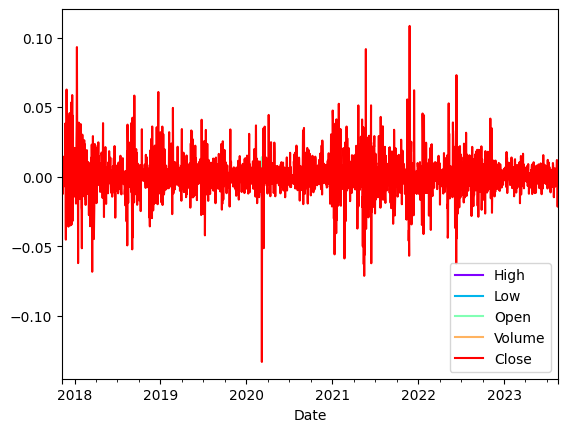

In [214]:
# Plotting in-sample LPD; replace `in_sample_lpd_df` with your actual LPD DataFrame
lpd_train_df_multivariate.plot(colormap='rainbow')
plt.show()

## Out of sample LPD

In [215]:
 x_test_eth_multivariate= X_test_eth
 y_test_eth_multivariate= y_test_eth

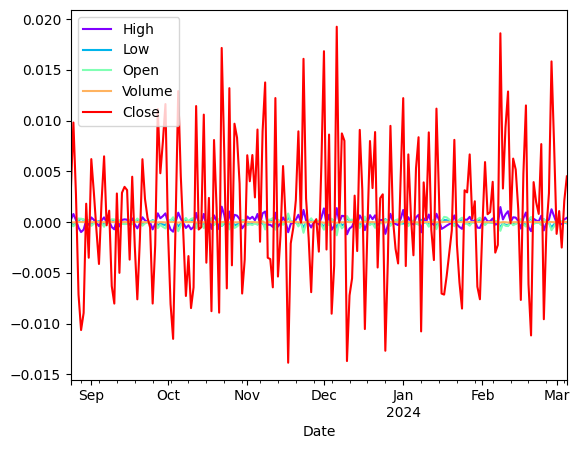

In [216]:
# Assuming the window length is 5
window_len = 5
# Extract the dates corresponding to the end of each window
dates = test_data_eth.index[window_len:]

lpd_test_df_multivariate = compute_lpd_lstm_dataframe(model_eth, x_test_eth_multivariate, y_test_eth_multivariate, feature_names,dates)
lpd_test_df_multivariate.plot(colormap='rainbow')
plt.show()


## Linear Regression (Flattened) vs LPD

In [217]:
train_data_eth

,High,Low,Open,Volume,close
Date,,,,,
2023-08-23 00:00:00+00:00,1696.593994,1629.581055,1634.401733,7191868448,1679.274414
2023-08-22 00:00:00+00:00,1668.638672,1596.384033,1667.279297,7244623133,1633.892578
2023-08-21 00:00:00+00:00,1685.082642,1651.959839,1685.022339,5077248383,1667.269043
2023-08-20 00:00:00+00:00,1692.328735,1662.901489,1669.587769,4105056995,1684.852051
2023-08-19 00:00:00+00:00,1693.228149,1654.075806,1660.844360,4871231360,1669.471924
...,...,...,...,...,...
2017-11-13 00:00:00+00:00,328.415009,307.024994,307.024994,1041889984,316.716003
2017-11-12 00:00:00+00:00,319.153015,298.513000,314.690002,1613479936,307.907990
2017-11-11 00:00:00+00:00,319.453003,298.191986,298.585999,842300992,314.681000


In [218]:
x_train_eth_multivariate[0]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.01647732, -0.02037151,  0.02011596,  0.00733532, -0.02702467],
       [-0.00678498,  0.01373285,  0.03097195, -0.2940293 , -0.00714914],
       [-0.00251401,  0.02044724,  0.02152839, -0.42920855,  0.00332146],
       [-0.00198388,  0.01503132,  0.01617878, -0.32267513, -0.00583734]])

In [219]:
# Assuming X_train_eth_multivariate.shape is (num_samples, window_len, num_features)
num_samples, window_len, num_features = x_train_eth_multivariate.shape

# Flatten the 3D data to 2D
X_train_flat = x_train_eth_multivariate.reshape((num_samples, window_len * num_features))
X_test_flat = x_test_eth_multivariate.reshape((x_test_eth_multivariate.shape[0], window_len * num_features))


In [220]:
X_train_flat.shape

(2109, 25)

In [221]:
y_train_eth_multivariate.shape

(2109,)

In [222]:
# Assuming y_train_eth_multivariate and x_train_eth_multivariate are correctly defined
reg_model = LinearRegression().fit(X_train_flat, y_train_eth_multivariate)

# Regression coefficients
reg_coeffs = reg_model.coef_
print("Regression Coefficients:", reg_coeffs)



# Making predictions
y_pred_train_reg = reg_model.predict(X_train_flat)
y_pred_test_reg = reg_model.predict(X_test_flat)

# Comparing standard deviations of residuals from regression and your neural network model might require storing those residuals first
reg_residuals_std = np.std(y_pred_train_reg - y_train_eth_multivariate)
print("Standard Deviation of Regression Residuals:", reg_residuals_std)


Regression Coefficients: [ 0.00000000e+00 -1.80411242e-16 -2.19442520e-16 -1.11022302e-16
  6.93889390e-17 -2.74794706e-02  1.03811173e-02 -5.86697762e-02
  2.57886921e-03  1.28734776e-02 -2.86416704e-02 -2.21529858e-03
 -3.17112054e-01  5.46719772e-05  8.06357206e-02 -1.36485130e-02
 -7.47925939e-03 -6.15215194e-01  1.11740452e-03  3.44410305e-01
  2.99831749e-02  2.18288948e-02  9.88221906e-01 -9.58988542e-04
  5.85479737e-01]
Standard Deviation of Regression Residuals: 0.005166357741599905


Unflatten the regression variables in the second axis to better compare with LPD:

In [223]:
# Exclude the intercept if it's included in reg_coeffs, adjust the index accordingly
feature_coeffs = reg_coeffs  # Adjust this based on your model's intercept inclusion

# Reshape the coefficients to match the LSTM input shape: [window_len, num_features]
reshaped_coeffs = feature_coeffs.reshape(window_len, num_features)

# Calculate the mean across the window_len dimension to get the average effect per feature
mean_coeffs = reshaped_coeffs.mean(axis=0)

print("Mean Regression Coefficients per Feature:", mean_coeffs)

# Assuming you've computed the LPD for your training data and stored it in a DataFrame named `lpd_train_df_multivariate`
mean_lpd = lpd_train_df_multivariate.mean(axis=0)
print("Mean LPD:", mean_lpd.values)

Mean Regression Coefficients per Feature: [-0.0079573   0.00450309 -0.00055502  0.00055839  0.20467985]
Mean LPD: [ 8.9296889e-05 -3.1954329e-05 -1.2476998e-05 -3.8180024e-06
  1.0677550e-03]


In [224]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# LSTM model evaluation
y_pred_test_lstm = model_eth_multivariate.predict(x_test_eth_multivariate).flatten()
mse_lstm = mean_squared_error(y_test_eth_multivariate, y_pred_test_lstm)
mae_lstm = mean_absolute_error(y_test_eth_multivariate, y_pred_test_lstm)

# Linear Regression model evaluation
mse_reg = mean_squared_error(y_test_eth_multivariate, y_pred_test_reg)
mae_reg = mean_absolute_error(y_test_eth_multivariate, y_pred_test_reg)

print(f"LSTM - MSE: {mse_lstm}, MAE: {mae_lstm}")
print(f"Linear Regression - MSE: {mse_reg}, MAE: {mae_reg}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LSTM - MSE: 3.6731583919416554e-05, MAE: 0.0045539698436985855
Linear Regression - MSE: 2.2317122653758756e-06, MAE: 0.0010962083447114688


## Buy and Hold vs LPD:

Extracting Close Prices

First, extract the 'close' price series from your dataset. Since you're interested in applying Buy and Hold, you might use the last 'close' price of each window to represent that window's value. This simplifies the 3D structure into a 1D time series you can directly apply Buy and Hold to:

In [225]:
x_train_eth_multivariate[0]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.01647732, -0.02037151,  0.02011596,  0.00733532, -0.02702467],
       [-0.00678498,  0.01373285,  0.03097195, -0.2940293 , -0.00714914],
       [-0.00251401,  0.02044724,  0.02152839, -0.42920855,  0.00332146],
       [-0.00198388,  0.01503132,  0.01617878, -0.32267513, -0.00583734]])

In [226]:
x_train_eth_multivariate[:, -1, -1]

array([-0.00583734,  0.01655708,  0.01059483, ..., -0.06955078,
       -0.05602401, -0.11366853])

In [227]:
# Example of extracting the 'Close' price from the last timestep of each window
# Assuming 'Close' is the last feature in your 3D array
close_prices_train = x_train_eth_multivariate[:, -1, -1]  # Last timestep, 'Close' feature for training set
close_prices_test = x_test_eth_multivariate[:, -1, -1]  # Same for test set


close_prices_train_series = pd.Series(close_prices_train, index=train_data_eth.index[window_len:])
close_prices_test_series = pd.Series(close_prices_test, index=test_data_eth.index[window_len:])


The graph below looks very flat, which is strange, maybe because we use min-max standardization for LSTM!

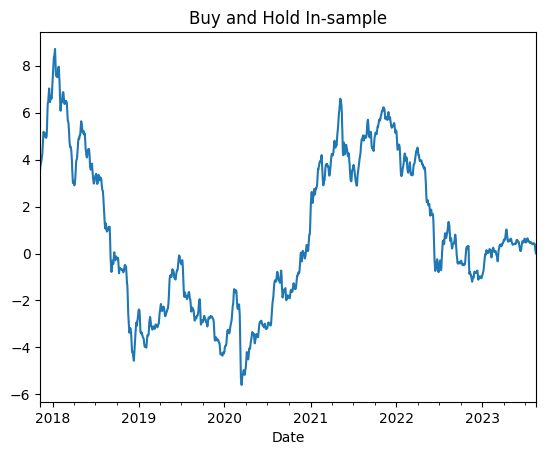

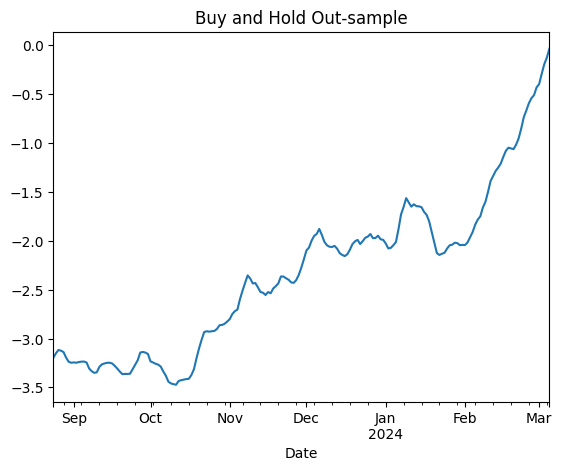

In [228]:
# # Calculate cumulative returns for Buy and Hold
# cumulative_returns_bh_train = (close_prices_train_series.pct_change() + 1).cumprod() - 1
# cumulative_returns_bh_test = (close_prices_test_series.pct_change() + 1).cumprod() - 1

# Plotting Buy and Hold In-sample and Out-sample
close_prices_train_series.cumsum().plot(title='Buy and Hold In-sample')
plt.show()

close_prices_test_series.cumsum().plot(title='Buy and Hold Out-sample')
plt.show()


### LPD-Based Strategy Performance

The strategy involves using the upper and lower quantiles of the absolute values of LPD to decide on market entries and exits. This strategy requires calculating rolling quantiles

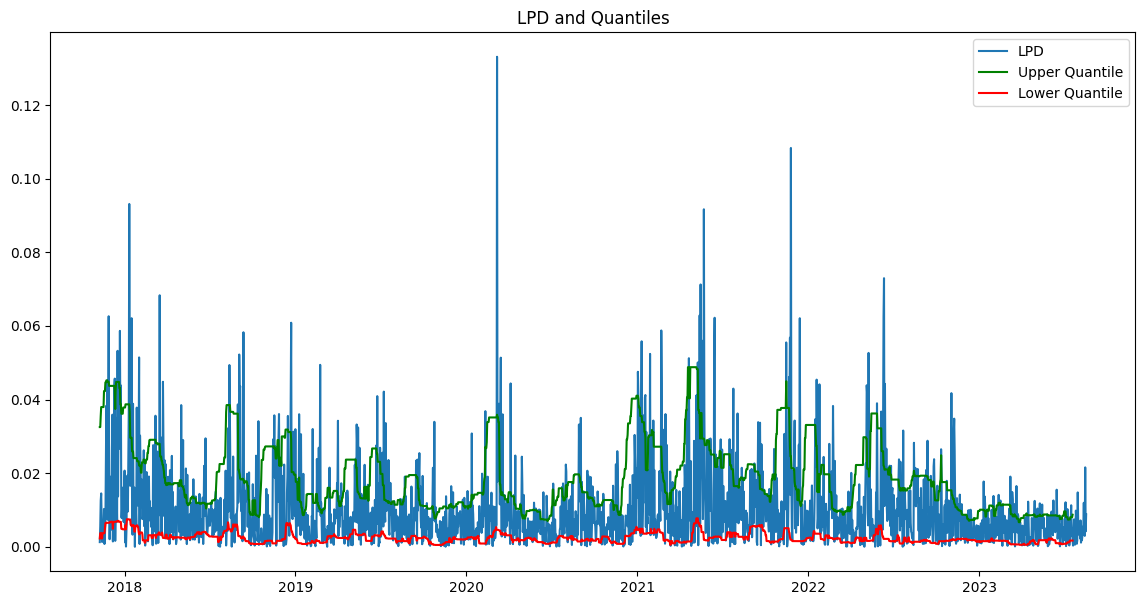

In [229]:
# Example DataFrame of LPDs (assuming LPD_t is your DataFrame of LPDs)
LPD_t = lpd_train_df_multivariate # Your actual LPD DataFrame goes here

k = 5  # Example feature index
quantile_select = 1 - 1/7
length_roll_quantile = 30  # Using one month

# Use absolute values of LPD
abs_LPD_t = LPD_t.abs()

# Rolling quantiles
roll_quant_up = abs_LPD_t.iloc[:, k-1].rolling(window=length_roll_quantile).quantile(quantile_select)
roll_quant_low = abs_LPD_t.iloc[:, k-1].rolling(window=length_roll_quantile).quantile(1 - quantile_select)

# Plotting LPD with upper and lower quantiles
plt.figure(figsize=(14, 7))
plt.plot(abs_LPD_t.index, abs_LPD_t.iloc[:, k-1], label='LPD')
plt.plot(roll_quant_up.index, roll_quant_up, label='Upper Quantile', color='green')
plt.plot(roll_quant_low.index, roll_quant_low, label='Lower Quantile', color='red')
plt.legend()
plt.title('LPD and Quantiles')
plt.show()


    Exit the market if the absolute LPD is above the upper quantile or below the lower quantile (signifying high risk).
    Enter (or stay in) the market otherwise.

In [230]:
def calculate_rolling_quantiles(abs_lpd_series, window=30, quantile=1-1/7):
    roll_quant_up = abs_lpd_series.rolling(window=window).quantile(quantile)
    roll_quant_low = abs_lpd_series.rolling(window=window).quantile(1 - quantile)
    return roll_quant_up, roll_quant_low

# Assuming 'lag_6' as the selected feature for demonstration
k = 'Close'
roll_quant_up, roll_quant_low = calculate_rolling_quantiles(abs_LPD_t[k], window=30)

In [231]:
close_prices_train_series

Date
2023-08-18 00:00:00+00:00   -0.005837
2023-08-17 00:00:00+00:00    0.016557
2023-08-16 00:00:00+00:00    0.010595
2023-08-15 00:00:00+00:00    0.071702
2023-08-14 00:00:00+00:00    0.094318
                               ...   
2017-11-13 00:00:00+00:00   -0.028713
2017-11-12 00:00:00+00:00   -0.047167
2017-11-11 00:00:00+00:00   -0.069551
2017-11-10 00:00:00+00:00   -0.056024
2017-11-09 00:00:00+00:00   -0.113669
Length: 2109, dtype: float64

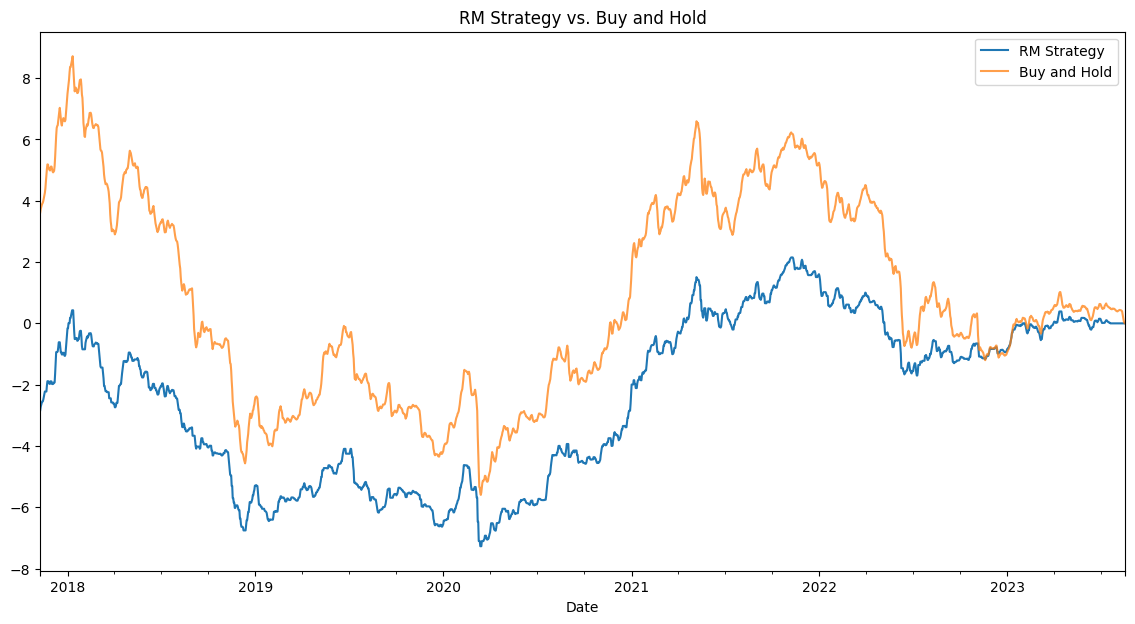

In [232]:
def simulate_strategy(abs_lpd_series, roll_quant_up, roll_quant_low, daily_returns):
    # Determine positions: 1 for holding the asset, 0 for exiting the market
    positions = ((abs_lpd_series <= roll_quant_up) & (abs_lpd_series >= roll_quant_low)).astype(int)
    # Calculate daily strategy returns by multiplying positions with daily returns
    strategy_returns = positions.shift(1) * daily_returns  # Shift positions to reflect action taken at the end of the day
    cumulative_returns = strategy_returns.cumsum()
    return cumulative_returns

# Simulate the strategy
daily_returns = close_prices_train_series
cumulative_returns = simulate_strategy(abs_LPD_t[k], roll_quant_up, roll_quant_low, daily_returns)

# Plot the cumulative returns of the strategy against buy-and-hold
plt.figure(figsize=(14, 7))
cumulative_returns.plot(label='RM Strategy', legend=True)
daily_returns.cumsum().plot(label='Buy and Hold', legend=True, alpha=0.75)
plt.title('RM Strategy vs. Buy and Hold')
plt.show()


# daily_returns = close_prices_test_series
# cumulative_returns = simulate_strategy(abs_LPD_t[k], roll_quant_up, roll_quant_low, daily_returns)
# # Plot the cumulative returns of the strategy against buy-and-hold
# plt.figure(figsize=(14, 7))
# cumulative_returns.plot(label='RM Strategy', legend=True)
# daily_returns.cumsum().plot(label='Buy and Hold', legend=True, alpha=0.75)
# plt.title('RM Strategy vs. Buy and Hold')
# plt.show()

In [233]:
abs_LPD_t

,High,Low,Open,Volume,Close
Date,,,,,
2023-08-18 00:00:00+00:00,0.000635,0.000302,0.000568,0.000025,0.008807
2023-08-17 00:00:00+00:00,0.000322,0.000131,0.000273,0.000007,0.004190
2023-08-16 00:00:00+00:00,0.002012,0.000540,0.000789,0.000057,0.021574
2023-08-15 00:00:00+00:00,0.000272,0.000038,0.000017,0.000015,0.002973
2023-08-14 00:00:00+00:00,0.000264,0.000110,0.000174,0.000009,0.003439
...,...,...,...,...,...
2017-11-13 00:00:00+00:00,0.000552,0.000228,0.000311,0.000023,0.007038
2017-11-12 00:00:00+00:00,0.001250,0.000372,0.000464,0.000006,0.014505
2017-11-11 00:00:00+00:00,0.001143,0.000329,0.000408,0.000008,0.012543


### Random networks

Todo:

In [234]:
def build_lstm_model(input_data, output_size, neurons, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model



np.random.seed(245)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 50
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.24
optimizer = 'adam'



# # please uncomment to train the model again
# train_data_eth, test_data_eth, X_train_eth_multivariate, X_test_eth_multivariate, y_train_eth_multivariate, y_test_eth_multivariate = prepare_data(train_data_eth,test_data_eth,
#     data_eth, aim, window_len=window_len, zero_base=zero_base, test_size=test_size)

# model_eth_multivariate = build_lstm_model(
#     input_data=x_train_eth_multivariate, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
#     optimizer=optimizer)
# model_eth.summary()


# modelfit_eth_multivariate = model_eth_multivariate.fit(
#     X_train_eth_multivariate, y_train_eth_multivariate, validation_data=(X_test_eth_multivariate, y_test_eth_multivariate), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)


In [235]:
def random_lpd_list_lstm(x_train_eth_multivariate,y_train_eth_multivariate,x_test_eth_multivariate,y_test_eth_multivariate):
  random_lpd_list = []
  num_nets = 2  # Number of random networks to train

  for i in range(num_nets):
      # Set the random seed for reproducibility
      np.random.seed(i)
      tf.random.set_seed(i)

      np.random.seed(245)
      window_len = 5
      test_size = 0.2
      zero_base = True
      lstm_neurons = 50
      epochs = 2
      batch_size = 32
      loss = 'mse'
      dropout = 0.24
      optimizer = 'adam'

      model_eth = build_lstm_model(
          input_data=x_train_eth_multivariate, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
          optimizer=optimizer)

      modelfit_eth = model_eth.fit(
          x_train_eth_multivariate, y_train_eth_multivariate, validation_data=(x_test_eth_multivariate, y_test_eth_multivariate),
          epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

      feature_names = ['High', 'Low', 'Open', 'Volume', 'Close']
      # Assuming the window length is 5
      # Extract the dates corresponding to the end of each window
      dates = train_data_eth.index[window_len:]

      # Now call the function with the dates
      lpd_train_df_multivariate = compute_lpd_lstm_dataframe(model_eth, x_train_eth_multivariate, y_train_eth_multivariate, feature_names,dates)
      lpd_train_df_multivariate


      random_lpd_list.append(lpd_train_df_multivariate)
  return random_lpd_list


random_lpd_list=random_lpd_list_lstm(x_train_eth_multivariate,y_train_eth_multivariate,x_test_eth_multivariate,y_test_eth_multivariate)
# Concatenate all LPD DataFrames along a new dimension
all_lpd_stack = np.dstack([df.values for df in random_lpd_list])  # Shape: [num_samples, num_features, num_models]

# Compute mean and standard deviation across the models (last dimension)
mean_lpd = np.mean(all_lpd_stack, axis=2)
std_lpd = np.std(all_lpd_stack, axis=2)

# Convert mean and STD back to DataFrame for easy plotting
mean_lpd_df = pd.DataFrame(mean_lpd, index=random_lpd_list[0].index, columns=random_lpd_list[0].columns)
std_lpd_df = pd.DataFrame(std_lpd, index=random_lpd_list[0].index, columns=random_lpd_list[0].columns)


Epoch 1/2


/home/pindalu/FS2024/ATSP/ATSF_PROJECT_ETH/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0095 - val_loss: 7.0879e-04
Epoch 2/2
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - val_loss: 5.5882e-04
Epoch 1/2


/home/pindalu/FS2024/ATSP/ATSF_PROJECT_ETH/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0098 - val_loss: 6.6850e-04
Epoch 2/2
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - val_loss: 6.8052e-04


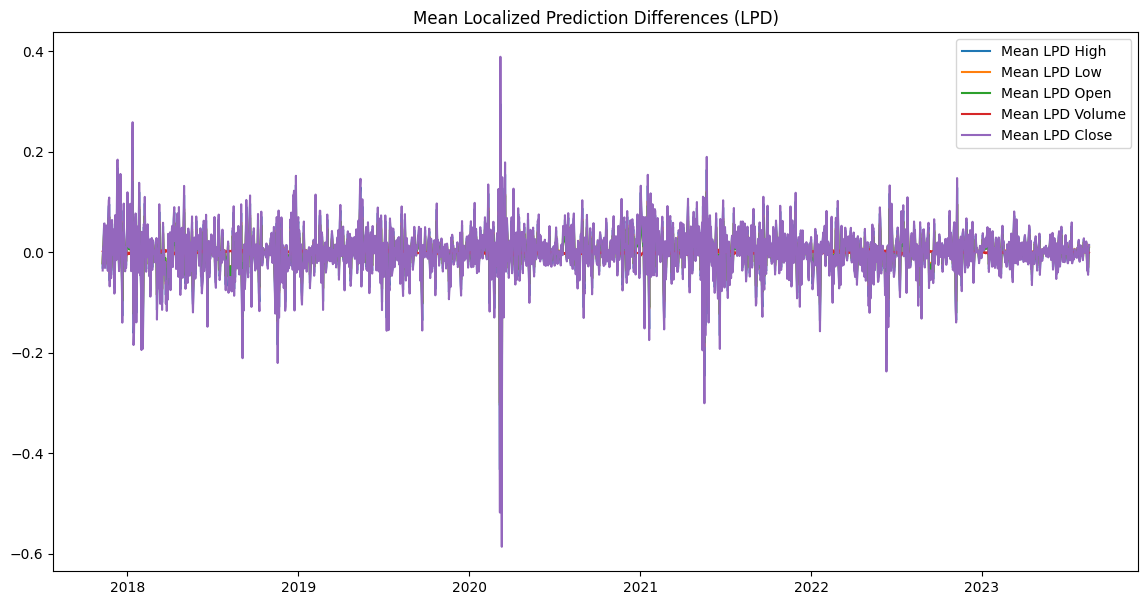

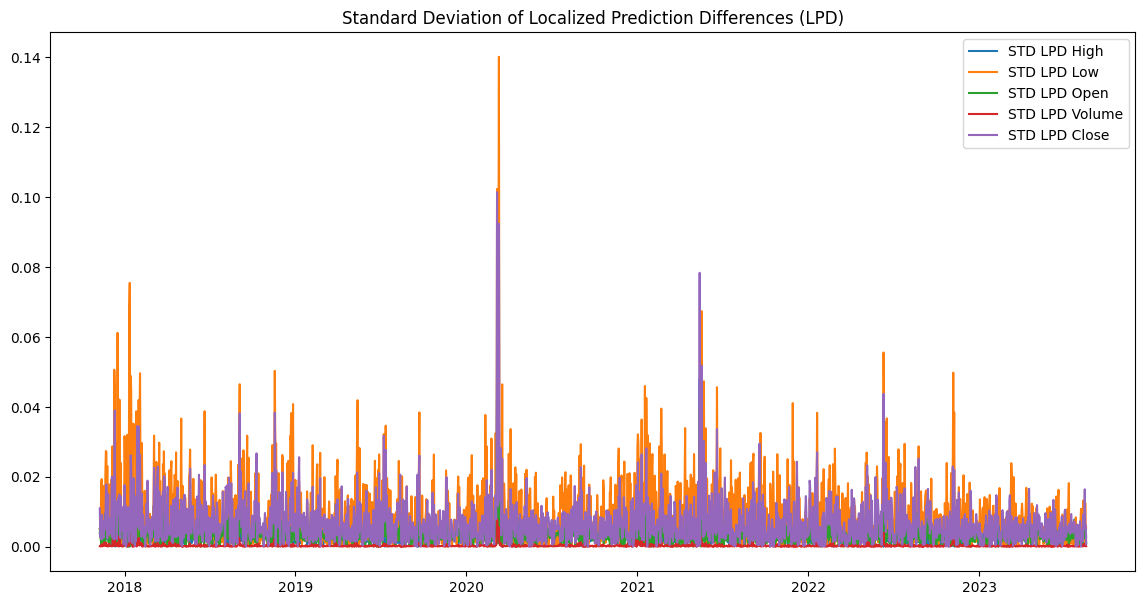

In [236]:
# Plot Mean LPD
plt.figure(figsize=(14, 7))
for col in mean_lpd_df.columns:
    plt.plot(mean_lpd_df.index, mean_lpd_df[col], label=f'Mean LPD {col}')
plt.title('Mean Localized Prediction Differences (LPD)')
plt.legend()
plt.show()

# Plot STD LPD
plt.figure(figsize=(14, 7))
for col in std_lpd_df.columns:
    plt.plot(std_lpd_df.index, std_lpd_df[col], label=f'STD LPD {col}')
plt.title('Standard Deviation of Localized Prediction Differences (LPD)')
plt.legend()
plt.show()


### LPD variance Strategy

In [237]:
# Compute variance across the models (last dimension)
LPD_var = np.var(all_lpd_stack, axis=2)

# Assuming the index from your LPD dataframes can represent the dates or sequence
LPD_var_df = pd.DataFrame(LPD_var, index=random_lpd_list[0].index, columns=random_lpd_list[0].columns)


In [238]:
LPD_var

array([[7.5558860e-06, 3.0088753e-05, 1.1853950e-06, 2.7496062e-08,
        5.1345228e-07],
       [3.7199286e-05, 3.4930588e-05, 1.5574647e-05, 1.6922945e-07,
        3.8183665e-05],
       [4.8041616e-06, 1.5769598e-04, 6.0906341e-06, 8.0694753e-07,
        4.1613905e-05],
       ...,
       [2.3915756e-05, 5.0687468e-05, 6.1960800e-06, 1.1425007e-07,
        7.1484128e-06],
       [1.8876375e-05, 3.0272973e-05, 6.6945204e-06, 6.4407040e-09,
        7.8549674e-06],
       [1.5272151e-05, 2.8170380e-05, 2.4765550e-05, 3.2398880e-08,
        1.2060317e-04]], dtype=float32)

In [239]:
LPD_var_df

,High,Low,Open,Volume,Close
Date,,,,,
2023-08-18 00:00:00+00:00,7.555886e-06,0.000030,1.185395e-06,2.749606e-08,5.134523e-07
2023-08-17 00:00:00+00:00,3.719929e-05,0.000035,1.557465e-05,1.692295e-07,3.818367e-05
2023-08-16 00:00:00+00:00,4.804162e-06,0.000158,6.090634e-06,8.069475e-07,4.161390e-05
2023-08-15 00:00:00+00:00,7.074863e-05,0.000003,8.467129e-05,4.476075e-08,2.702248e-04
2023-08-14 00:00:00+00:00,1.293125e-07,0.000068,6.330320e-06,2.512656e-07,5.470910e-05
...,...,...,...,...,...
2017-11-13 00:00:00+00:00,5.869663e-05,0.000374,2.071336e-06,5.009142e-07,4.392135e-06
2017-11-12 00:00:00+00:00,3.306190e-05,0.000315,1.768760e-08,2.022770e-07,2.234288e-05
2017-11-11 00:00:00+00:00,2.391576e-05,0.000051,6.196080e-06,1.142501e-07,7.148413e-06


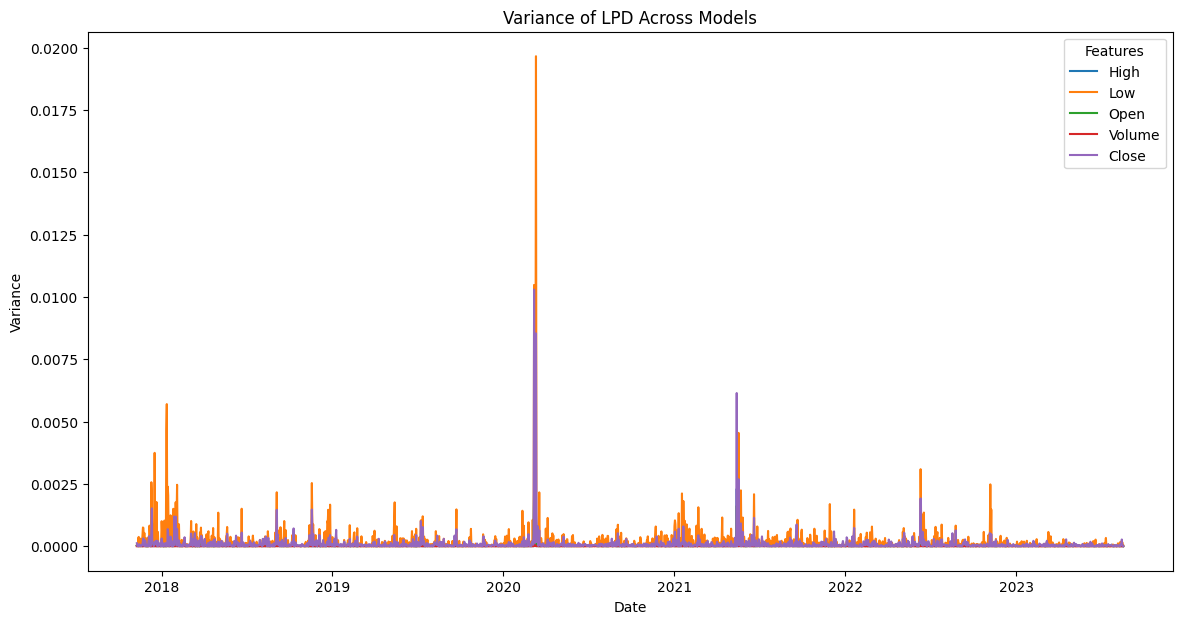

In [240]:
plt.figure(figsize=(14, 7))
for column in LPD_var_df.columns:
    plt.plot(LPD_var_df.index, LPD_var_df[column], label=column)
plt.legend(title="Features")
plt.title("Variance of LPD Across Models")
plt.xlabel("Date")
plt.ylabel("Variance")
plt.show()


#### Strategy Implementation

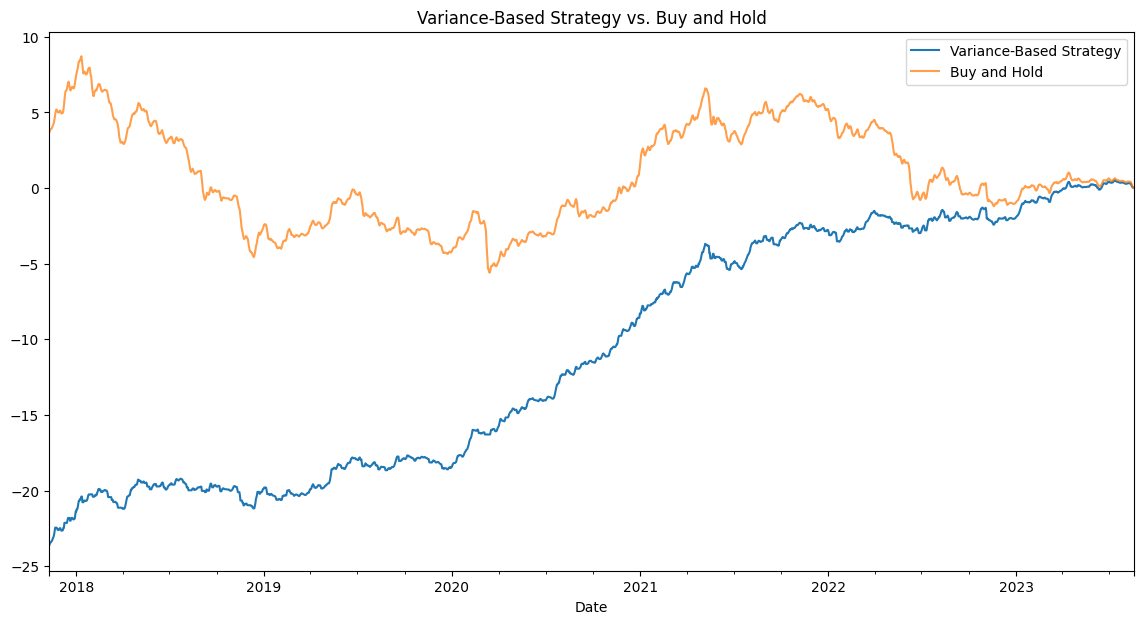

In [241]:
def simulate_variance_strategy(daily_returns, LPD_variance, threshold):
    """
    Simulate a trading strategy based on LPD variance.
    Args:
        daily_returns (pd.Series): The daily returns of the asset.
        LPD_variance (pd.Series): The variance of LPD for a specific feature.
        threshold (float): The variance threshold for deciding market entry/exit.
    Returns:
        pd.Series: The cumulative returns of the strategy.
    """
    # Market position: 1 for in-market, 0 for out-of-market
    position = (LPD_variance < threshold).astype(int)
    strategy_returns = position.shift(1) * daily_returns  # Shift positions for real trading scenario
    cumulative_returns = strategy_returns.cumsum()
    return cumulative_returns

# Example usage with 'Close' variance and an arbitrary threshold
variance_threshold = LPD_var_df['Close'].quantile(0.75)  # Using the 75th percentile as threshold
cumulative_returns_var_strategy = simulate_variance_strategy(
    daily_returns=daily_returns,
    LPD_variance=LPD_var_df['Close'],
    threshold=variance_threshold
)

# Plotting the strategy returns against buy-and-hold
plt.figure(figsize=(14, 7))
cumulative_returns_var_strategy.plot(label='Variance-Based Strategy', legend=True)
daily_returns.cumsum().plot(label='Buy and Hold', legend=True, alpha=0.75)
plt.title('Variance-Based Strategy vs. Buy and Hold')
plt.show()


Key Notes:

The risk_free_rate is set to 0 for simplicity. If you have a specific risk-free rate in mind (e.g., the yield on a 3-month Treasury bill), you can adjust the risk_free_rate parameter accordingly.
The function cumulative_returns_var_strategy.diff() calculates the daily returns from the cumulative returns of the variance-based strategy for the Sharpe Ratio calculation.
The returns and standard deviation are annualized by assuming there are 252 trading days in a year, which is standard practice.

In [242]:
def calculate_sharpe_ratio(daily_returns, risk_free_rate=0):
    """
    Calculate the Sharpe Ratio for a series of daily returns.
    Args:
        daily_returns (pd.Series): Daily returns of the strategy.
        risk_free_rate (float): Daily risk-free rate, default is 0.
    Returns:
        float: The Sharpe Ratio.
    """
    # Adjust returns for risk-free rate
    excess_returns = daily_returns - risk_free_rate

    # Annualize the returns and standard deviation
    annualized_return = excess_returns.mean() * 252
    annualized_std = excess_returns.std() * np.sqrt(252)

    return annualized_return / annualized_std

# Calculate Sharpe Ratios
sharpe_ratio_buy_and_hold = calculate_sharpe_ratio(daily_returns)
sharpe_ratio_var_strategy = calculate_sharpe_ratio(cumulative_returns_var_strategy.diff())

# Print Sharpe Ratios
print(f"Sharpe Ratio - Buy and Hold: {sharpe_ratio_buy_and_hold:.2f}")
print(f"Sharpe Ratio - Variance-Based Strategy: {sharpe_ratio_var_strategy:.2f}")


Sharpe Ratio - Buy and Hold: 0.27
Sharpe Ratio - Variance-Based Strategy: -2.56


The buy and hold is positve and therefor better than variance based strategy

Sharpe Ratio for absolute LPDs

In [243]:
# Calculate Sharpe Ratios
sharpe_ratio_abs_strategy = calculate_sharpe_ratio(cumulative_returns.diff())

# Print Sharpe Ratios
print(f"Sharpe Ratio - Buy and Hold: {sharpe_ratio_buy_and_hold:.2f}")
print(f"Sharpe Ratio - abs-Based Strategy: {sharpe_ratio_abs_strategy:.2f}")

Sharpe Ratio - Buy and Hold: 0.27
Sharpe Ratio - abs-Based Strategy: -0.27


Conclusion: So variance strategy is better than the absolute Strategy